<div class="alert alert-block alert-success">

**scLepr hypothalamus analysis**

analysis of neuronal and nonneuronal populations

</div>

<div class="alert alert-warning">

**What this notebook does**
    
This notebook analysis the tdtomato sorted Lepr+ cells from the hypothalamus

The downsampled dataset is not regressed for nCounts
    
Neurons are subsetted using 'neuronal cluster' information based on Tubb3 and Mapt expression. Nonneuronal cells are analysed seperately

</div>  

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os

sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
data = './'
results_file_neuron = '../rawdata/Lepr_hypothalamus_tomcells_analysis_neuron.h5ad'  # the file that will store the analysis results
results_file_nonneuron = '../rawdata/Lepr_hypothalamus_tomcells_down_analysis_nonneuron.h5ad'  # the file that will store the analysis results
results_file_agrpneurons = '../rawdata/Lepr_hypothalamus_tomcells_down_analysis_agrpneurons.h5ad'  # the file that will store the analysis results


scanpy==1.4.6 anndata==0.7.1 umap==0.4.0 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.7.1


In [4]:
#adata = sc.read('./rawdata/Lepr_hypothalamus_tomcells_analysis.h5ad')
adata_down = sc.read('./rawdata/Lepr_hypothalamus_tomcells_down_analysis_celltype.h5ad')

In [6]:
sc.settings.set_figure_params(dpi=80)

In [7]:
adata_down

AnnData object with n_obs × n_vars = 824 × 1980 
    obs: 'ERCC_genes', 'n_counts_withERCCmito', 'n_genes', 'n_counts_with_mito', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'type', 'plate', 'condition', 'chrY_counts', 'chrX_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'normalisation_factor', 'n_counts_down', 'leiden', 'leiden_condition', 'leiden_cluster_numbers', 'cell_types', 'cell_types_condition'
    var: 'fullname', 'ENS_names', 'geneid', 'feature', 'chr', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variab

## Subset the neurons


In [8]:
adata_down_neuron = adata_down[adata_down.obs['cell_types'].isin(["Agrp_neurons_1","Agrp_neurons_2","Crhr2_Npw_neurons",
                                                                "Pomc_neurons","Crhr2_Prlh_neurons","Crhr2_Crh_neurons",
                                                                "Agrp_neurons_3","Ghrh_neurons"])]
adata_down_nonneuron = adata_down[adata_down.obs['cell_types'].isin(["endothelial_1","Tanycytes_1","Tanycytes_2","Tanycytes_3",
"endothelial_3","Tanycytes_4","endothelial_2","Vlmcs_Igf2_Edn3",
"Vlmcs_Igf2_Igf1","Astrocytes","endothelial_4","OPCs",
"Microglia","Vlmcs_penk_Gnrh2","oligodendrocytes","Nrn1_non_neuronal"])]

In [101]:
adata_down_neuron

AnnData object with n_obs × n_vars = 373 × 1980 
    obs: 'ERCC_genes', 'n_counts_withERCCmito', 'n_genes', 'n_counts_with_mito', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'type', 'plate', 'condition', 'chrY_counts', 'chrX_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'normalisation_factor', 'n_counts_down', 'leiden', 'leiden_condition', 'leiden_cluster_numbers', 'cell_types'
    var: 'fullname', 'ENS_names', 'geneid', 'feature', 'chr', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersio

In [10]:
adata_down_nonneuron # Excludes pitutiary

View of AnnData object with n_obs × n_vars = 411 × 1980 
    obs: 'ERCC_genes', 'n_counts_withERCCmito', 'n_genes', 'n_counts_with_mito', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'type', 'plate', 'condition', 'chrY_counts', 'chrX_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'normalisation_factor', 'n_counts_down', 'leiden', 'leiden_condition', 'leiden_cluster_numbers', 'cell_types', 'cell_types_condition'
    var: 'fullname', 'ENS_names', 'geneid', 'feature', 'chr', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highl

### Computing the neighborhood graph

Let us compute the neighborhood graph of cells using the PCA representation of the data matrix. You might simply use default values here. For the sake of reproducing Seurat's results, let's take the following values.

In [11]:
sc.pp.neighbors(adata_down_neuron, n_neighbors=15, n_pcs=40) #knn 
sc.pp.neighbors(adata_down_nonneuron, n_neighbors=15, n_pcs=40) # , n_pcs=40

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00)


### Embedding the neighborhood graph

In [12]:
sc.tl.umap(adata_down_neuron,spread = 2,maxiter =100,min_dist=0.5,gamma=2)
sc.tl.umap(adata_down_nonneuron,spread = 2,maxiter =100,min_dist=0.5,gamma=2)

computing UMAP
    finished (0:00:00)
computing UMAP
    finished (0:00:00)


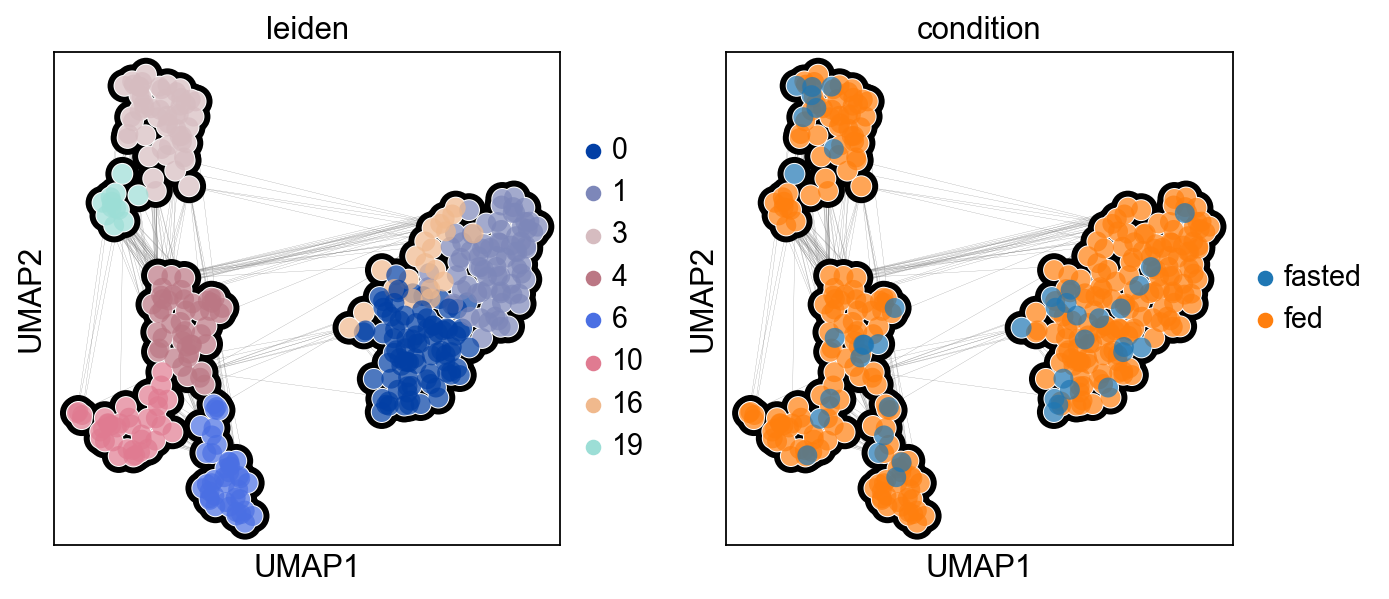

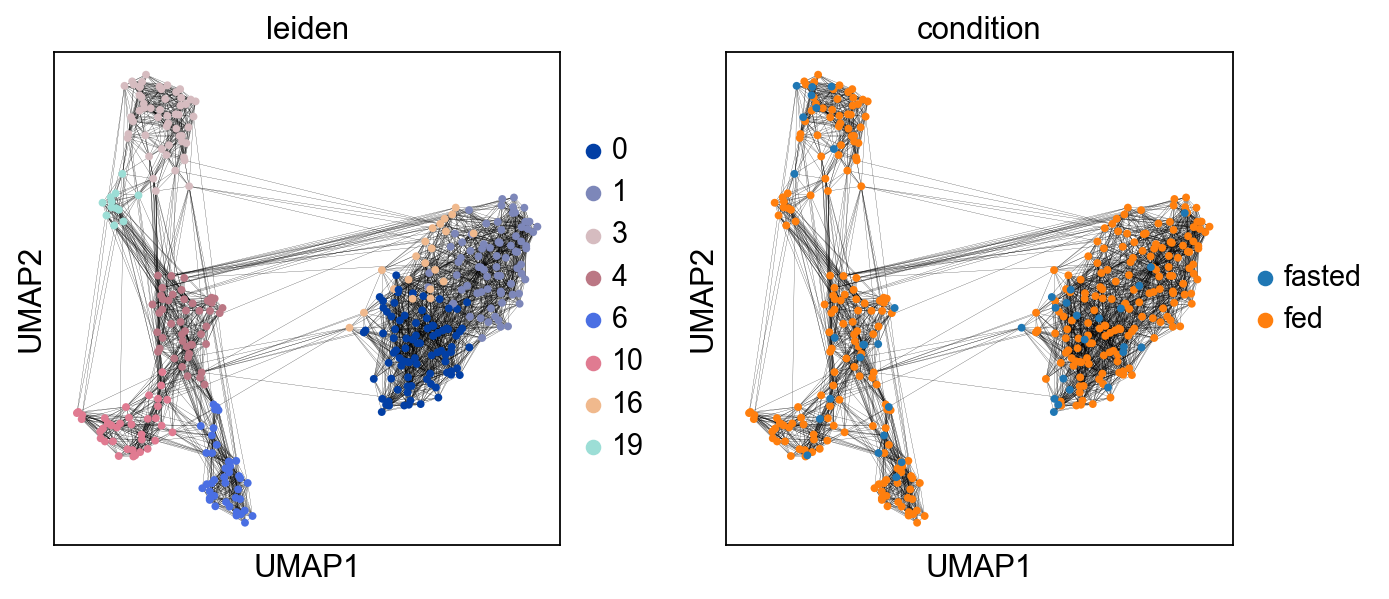

In [13]:
sc.pl.umap(adata_down_neuron, color=['leiden','condition'], add_outline=True,
                          use_raw=True,edges=True,save='_neurons_leiden_lined.pdf')
sc.pl.umap(adata_down_neuron, color=['leiden','condition'], add_outline=False,
                          s=50,edges_color='black',use_raw=True,edges=True
           ,save='_neurons_leiden_connection.pdf')


Plot main stats for neuronal cells

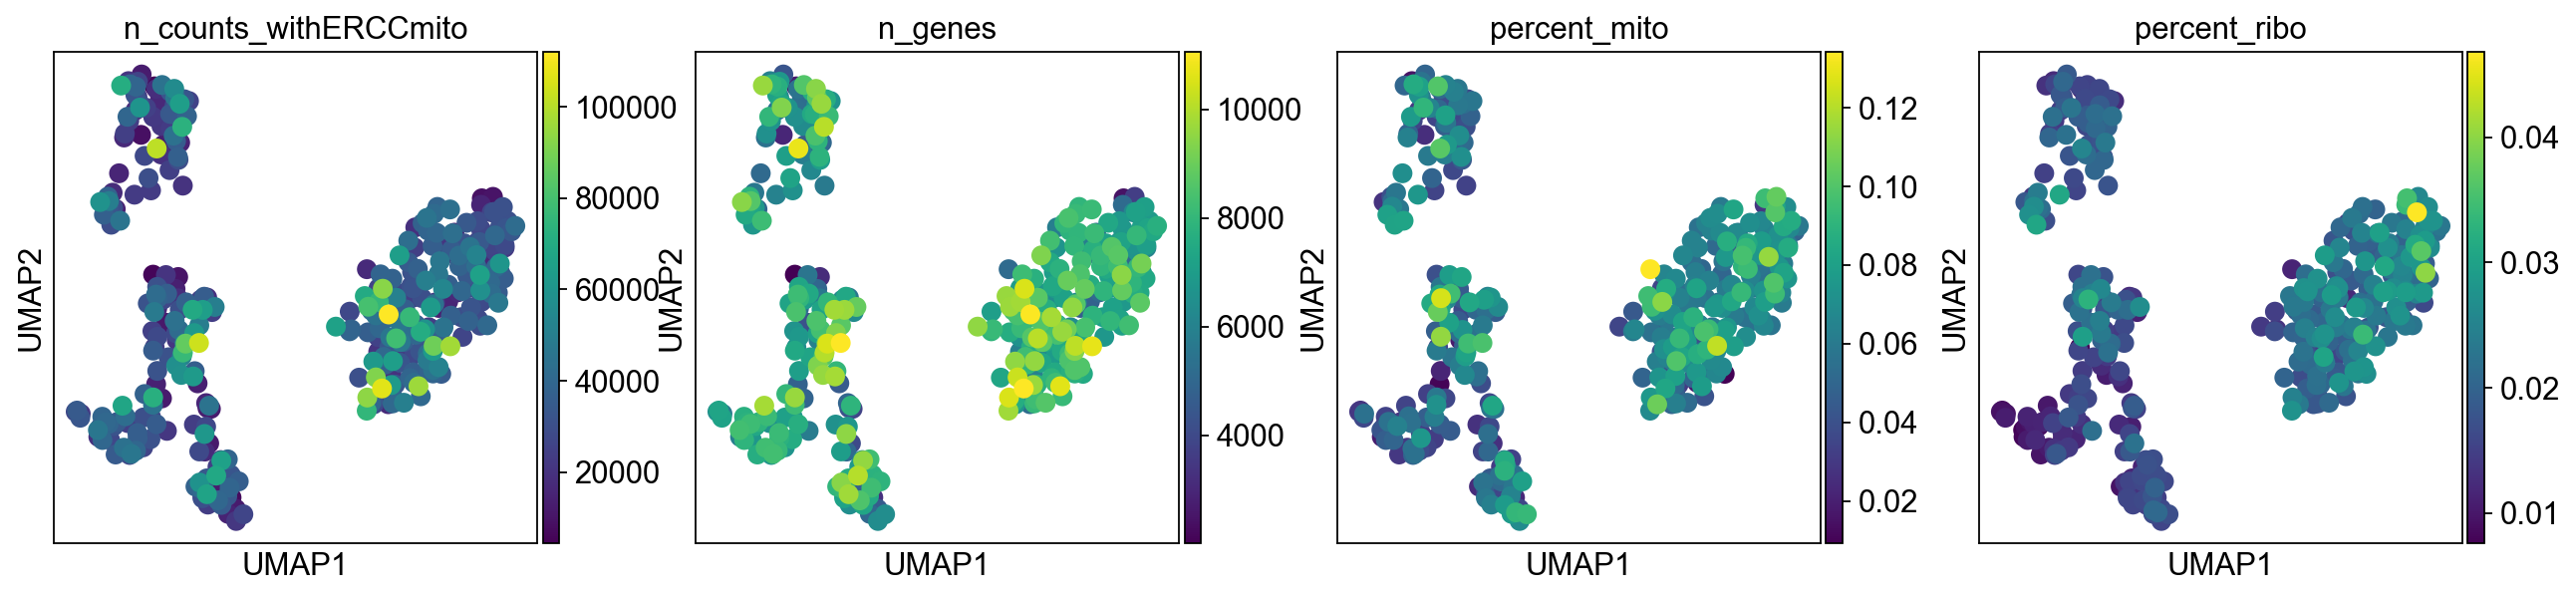

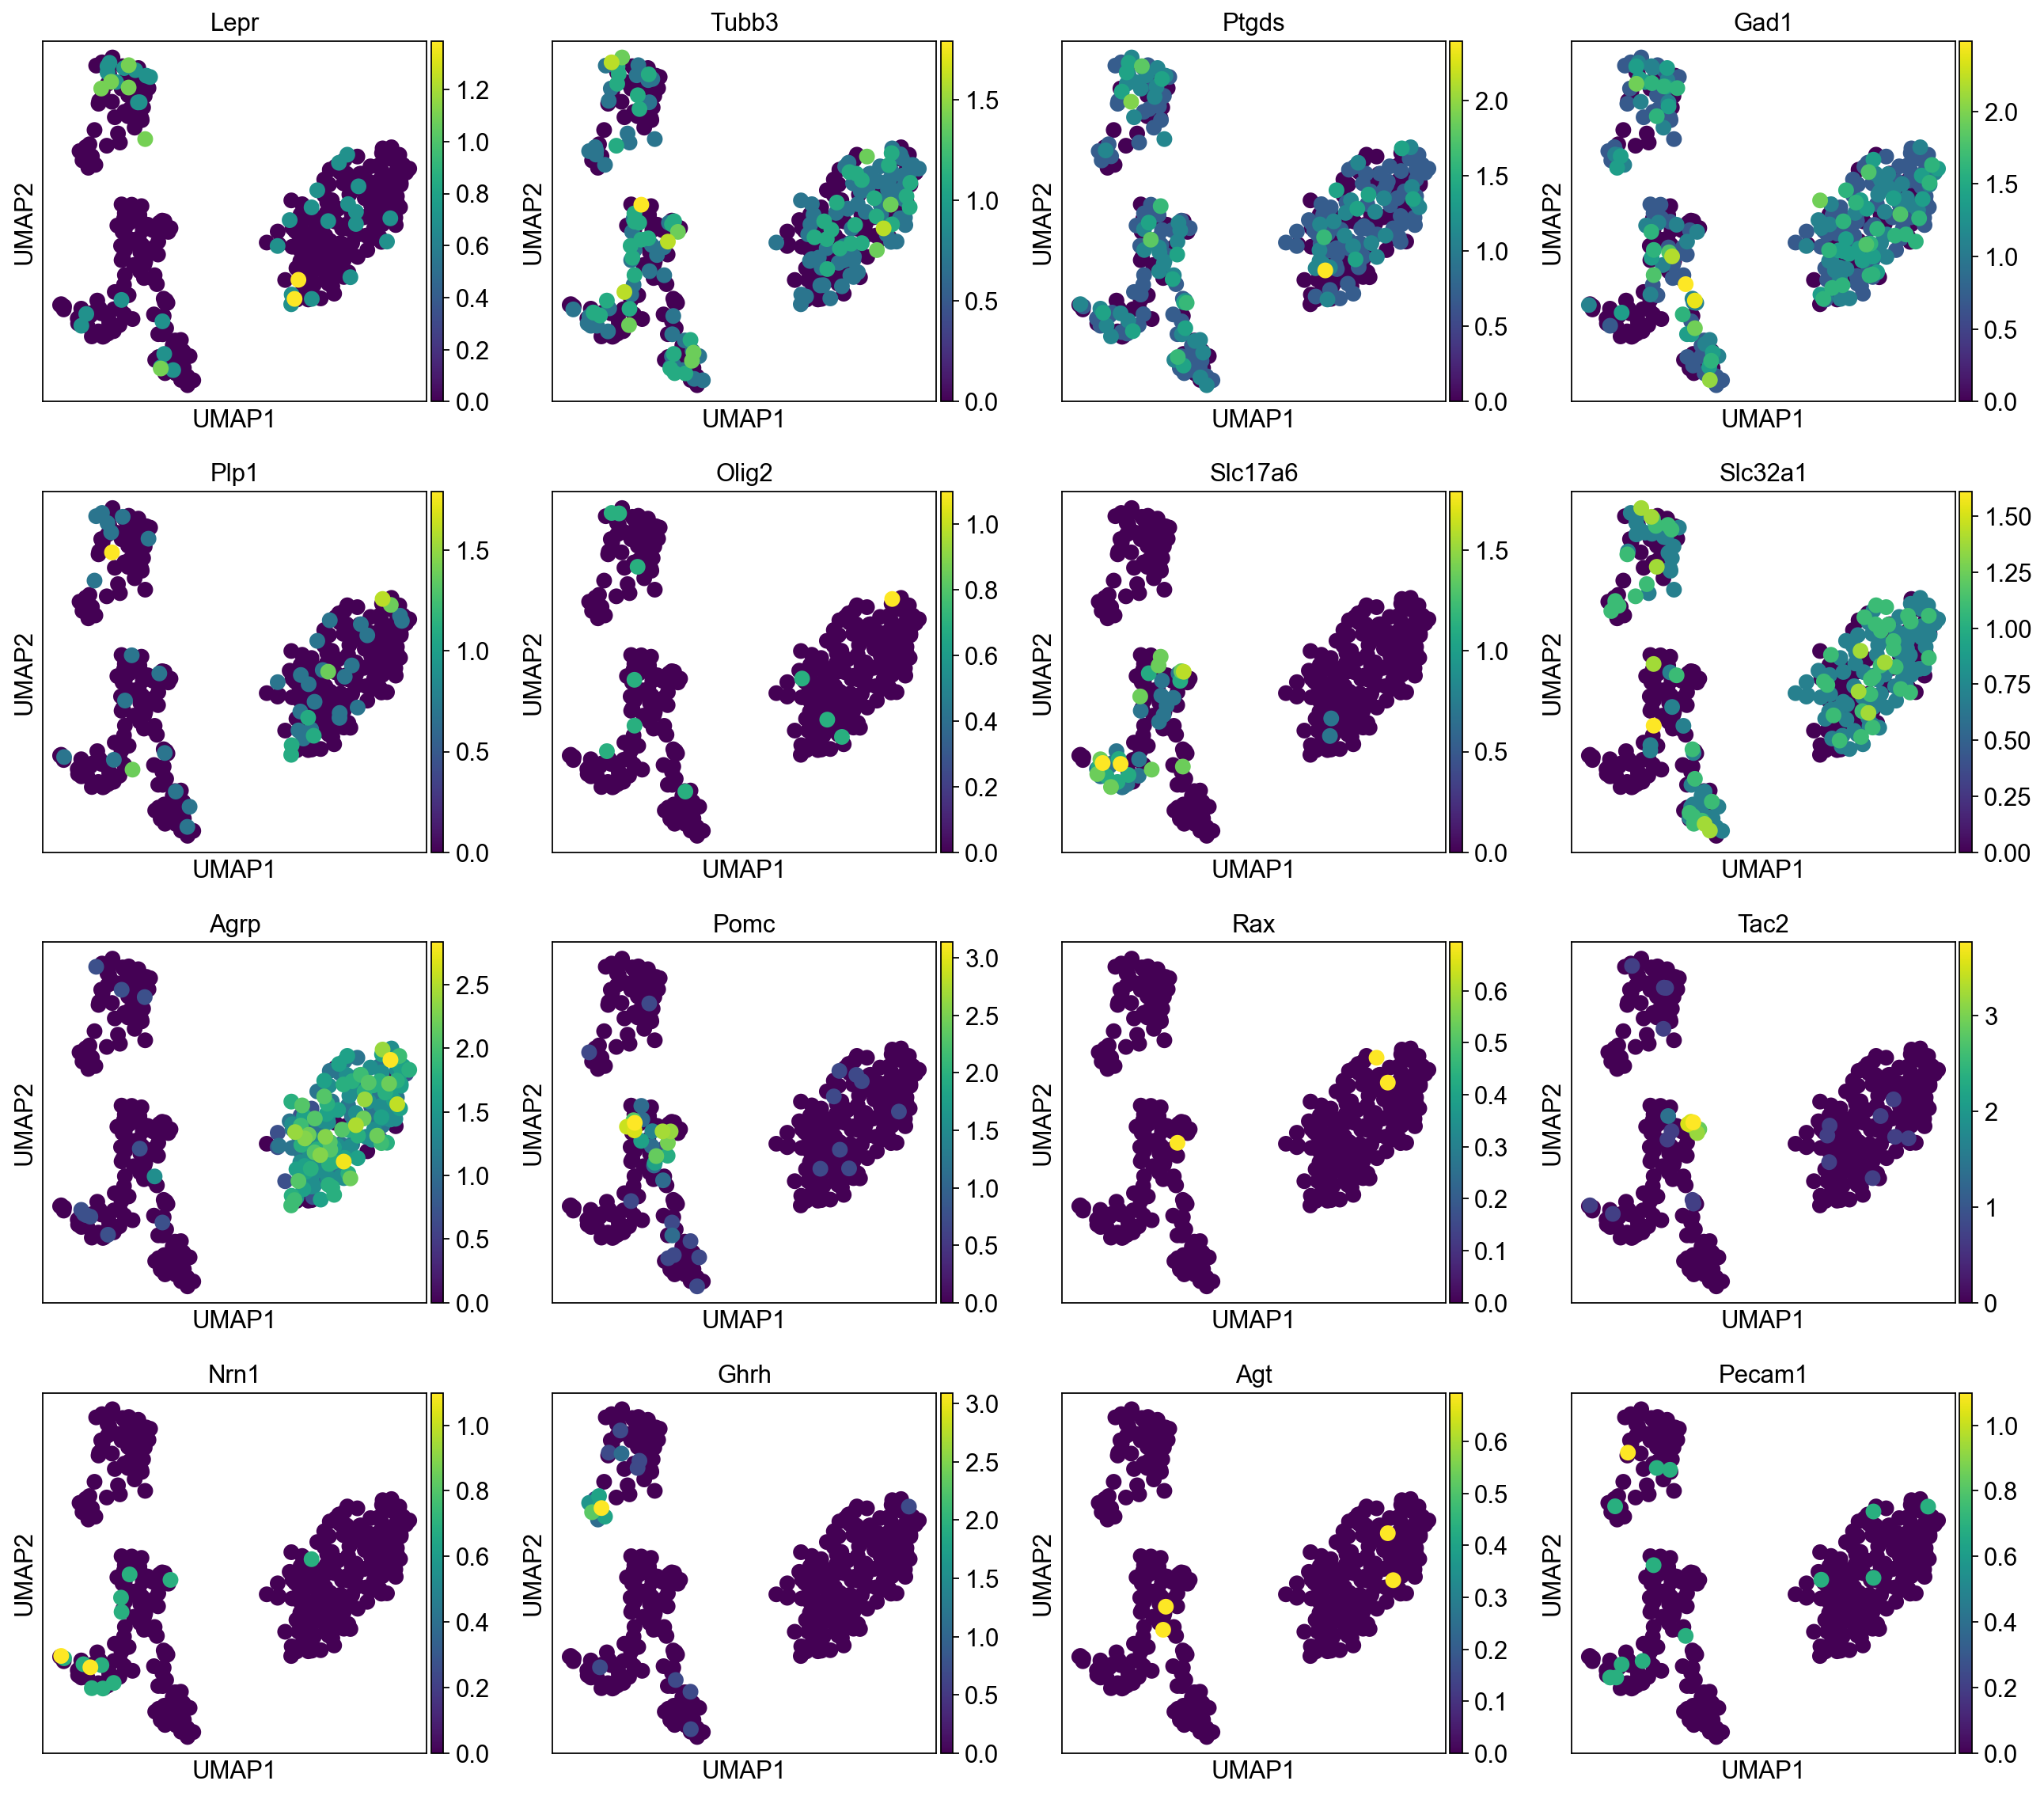

In [15]:
sc.pl.umap(adata_down_neuron, color=['n_counts_withERCCmito','n_genes','percent_mito','percent_ribo'],
                          use_raw=True, save="_tomcells_neurons_umap_stats.pdf")
sc.pl.umap(adata_down_neuron, color=['Lepr','Tubb3','Ptgds','Gad1',
                              'Plp1','Olig2','Slc17a6','Slc32a1',
                         'Agrp','Pomc','Rax','Tac2',
                        'Nrn1','Ghrh','Agt','Pecam1'], use_raw=True, save="_tomcells_neurons_markers_1.pdf")

Now nonneuronal

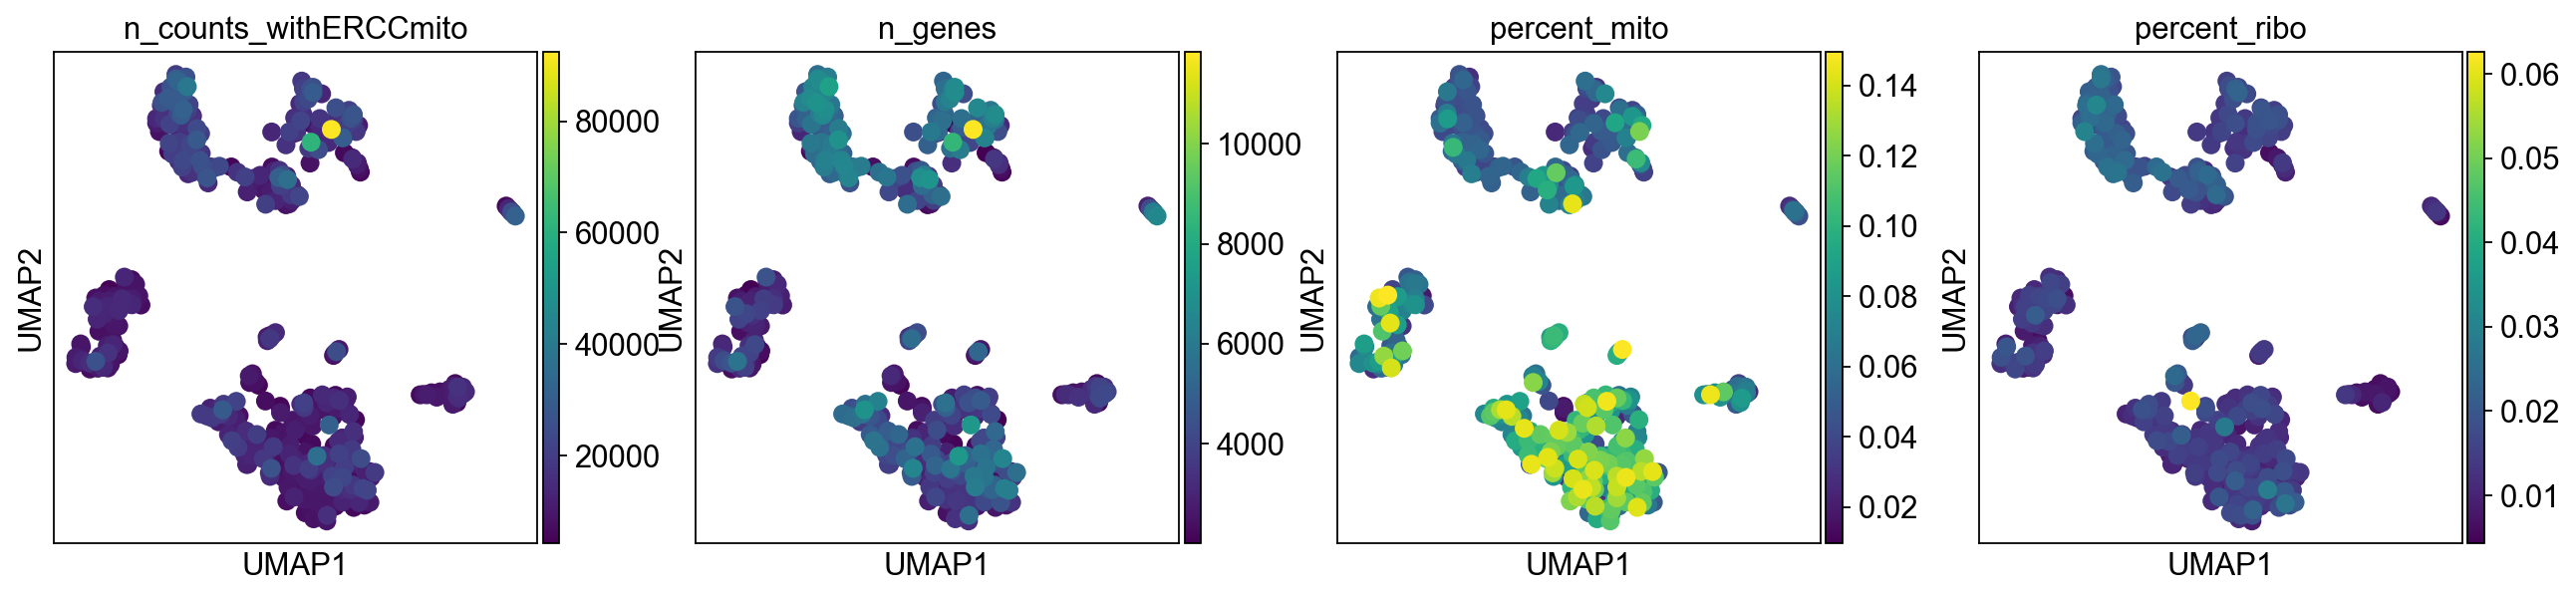

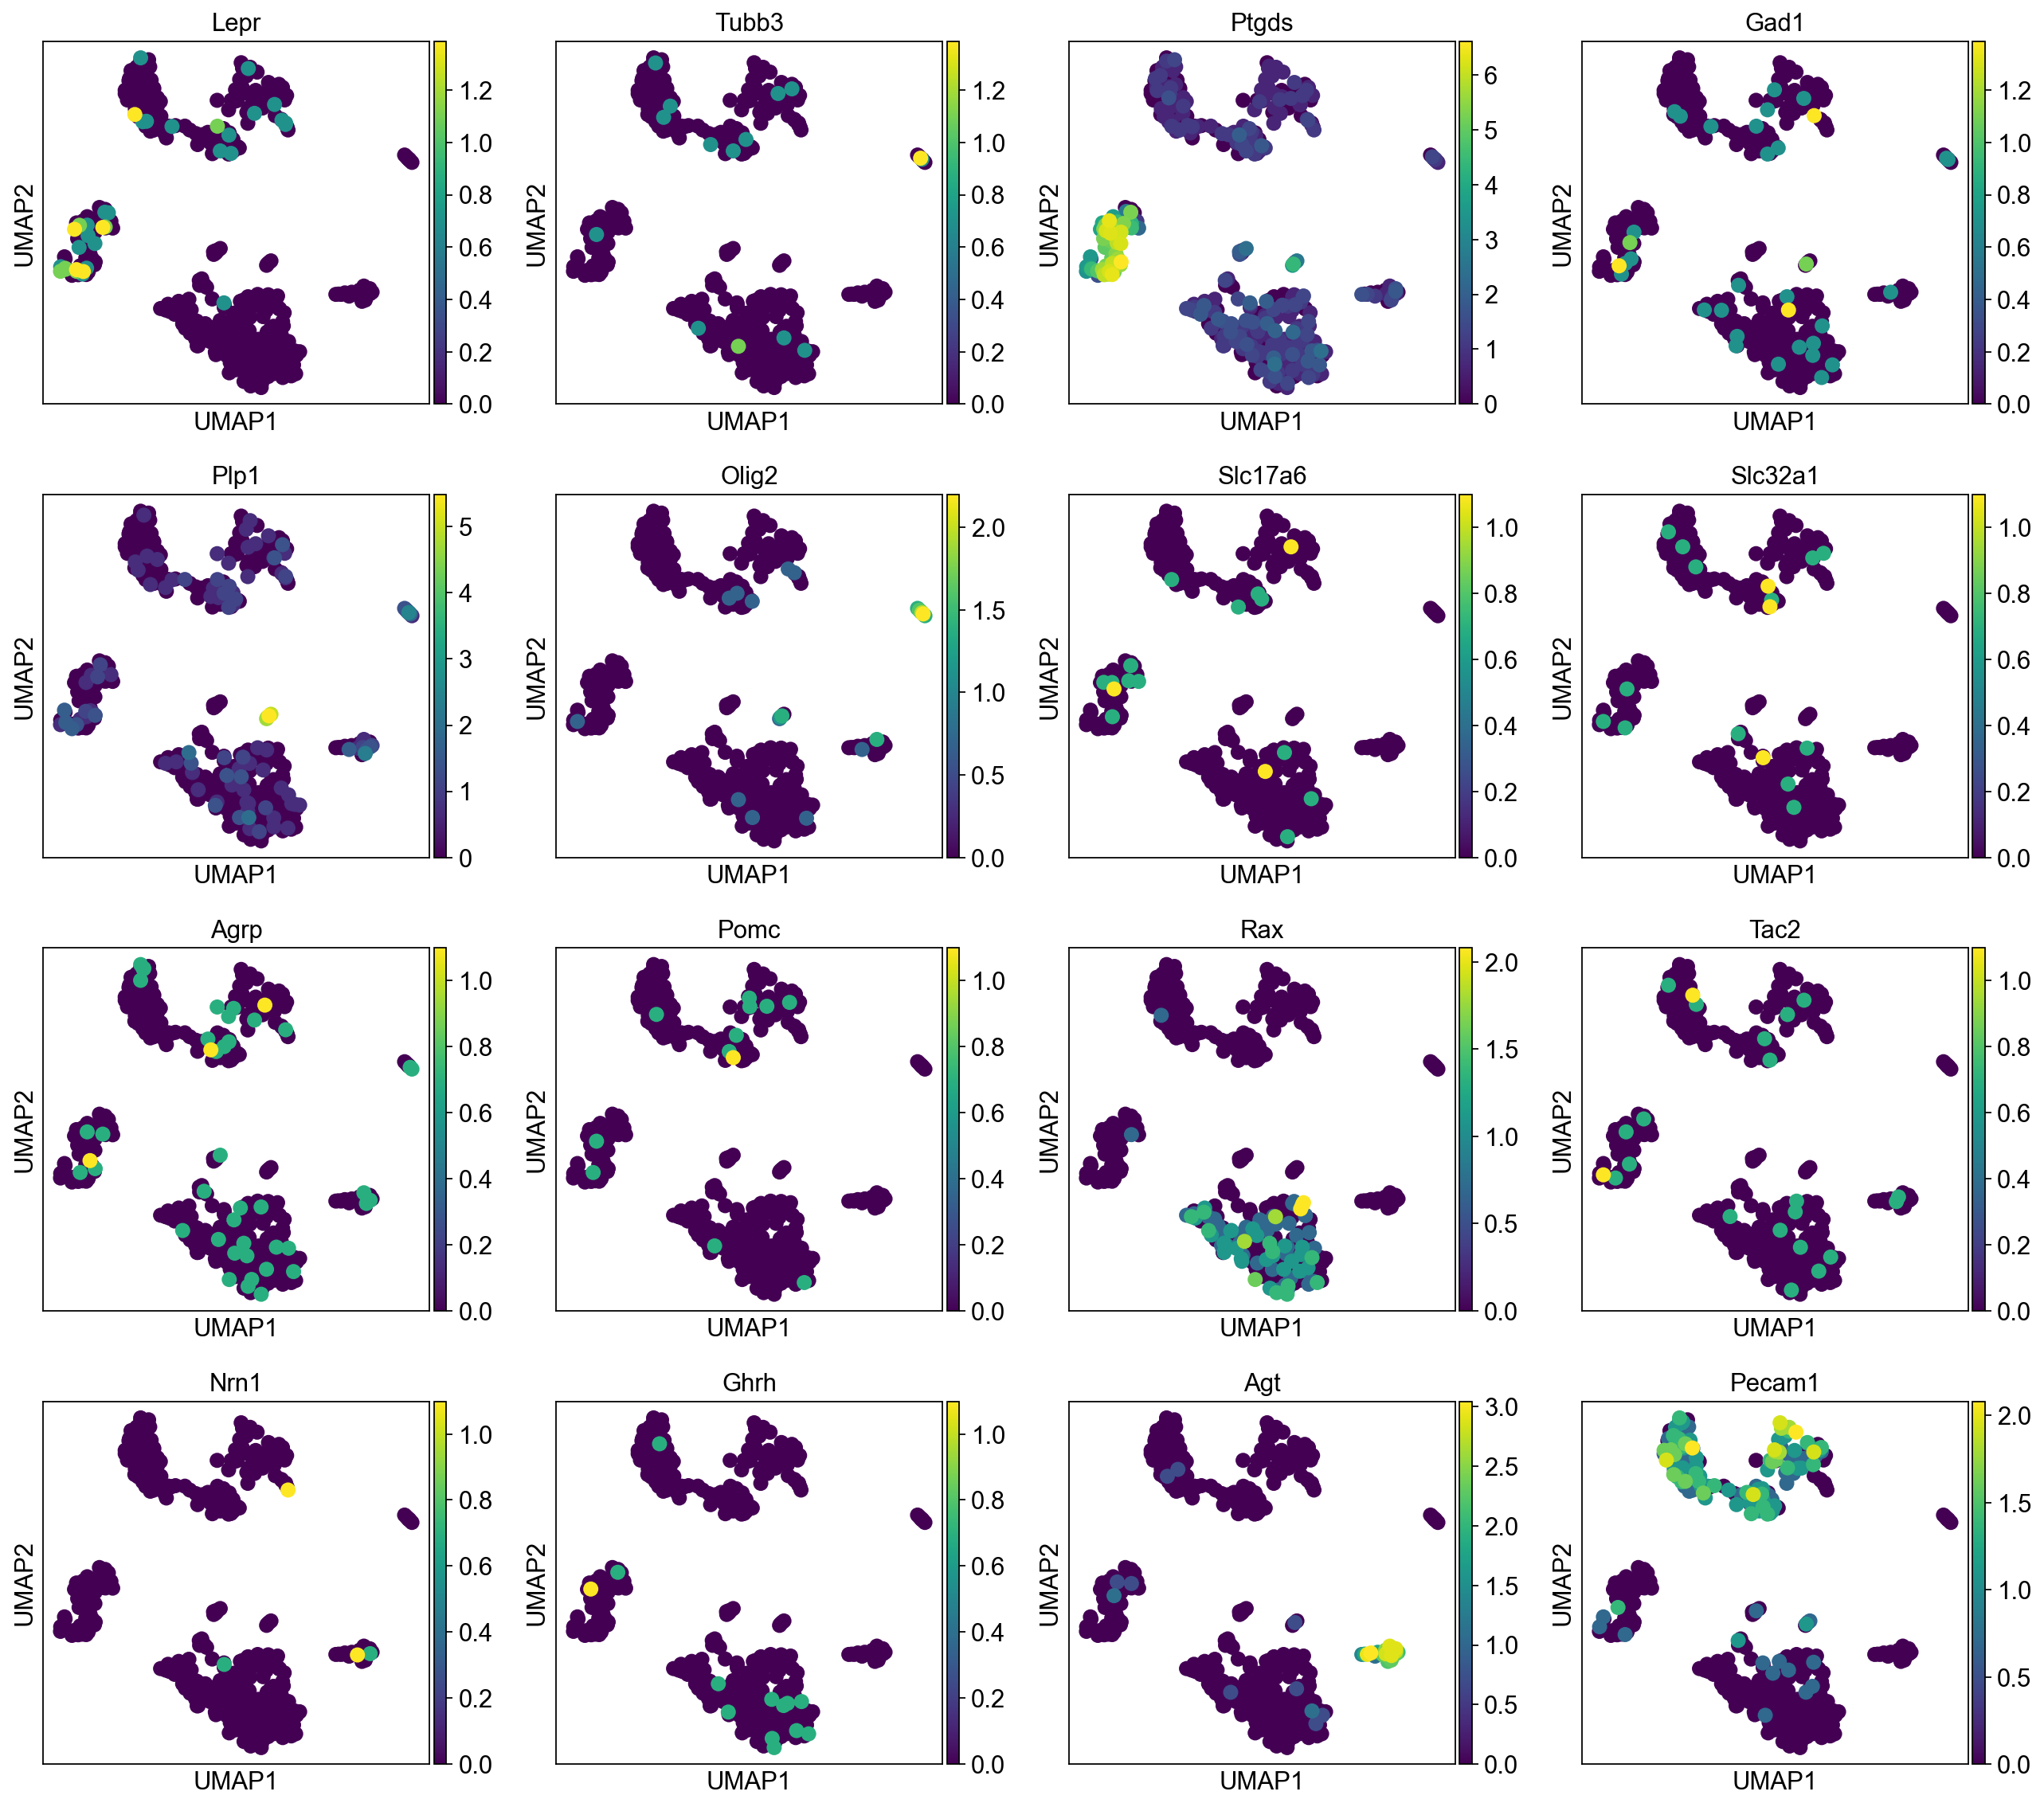

In [16]:
sc.pl.umap(adata_down_nonneuron, color=['n_counts_withERCCmito','n_genes','percent_mito','percent_ribo'],
                         use_raw=True, save="_tomcells_nonneurons_umap_stats.pdf")
sc.pl.umap(adata_down_nonneuron, color=['Lepr','Tubb3','Ptgds','Gad1',
                              'Plp1','Olig2','Slc17a6','Slc32a1',
                         'Agrp','Pomc','Rax','Tac2',
                        'Nrn1','Ghrh','Agt','Pecam1'], use_raw=True, save="_tomcells_nonneurons_markers_1.pdf")

## Cell types

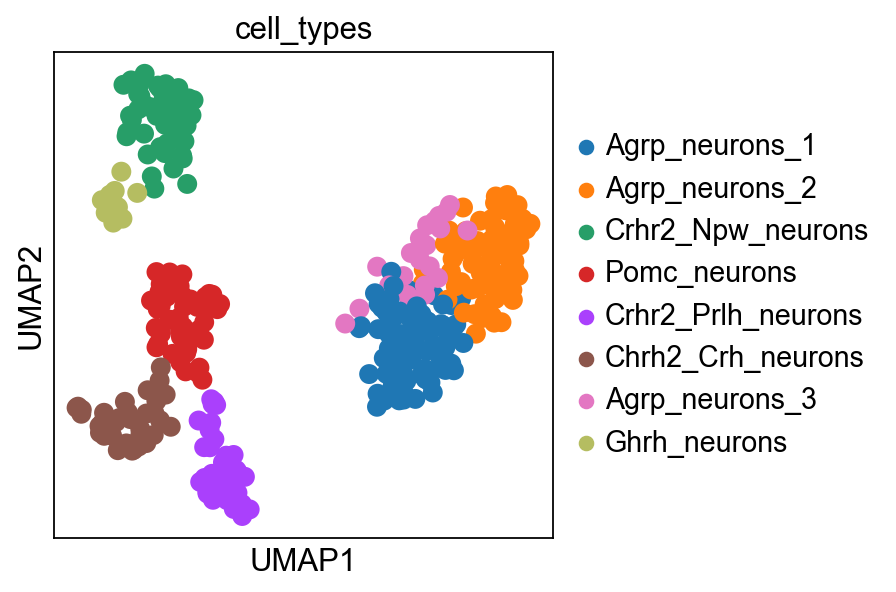

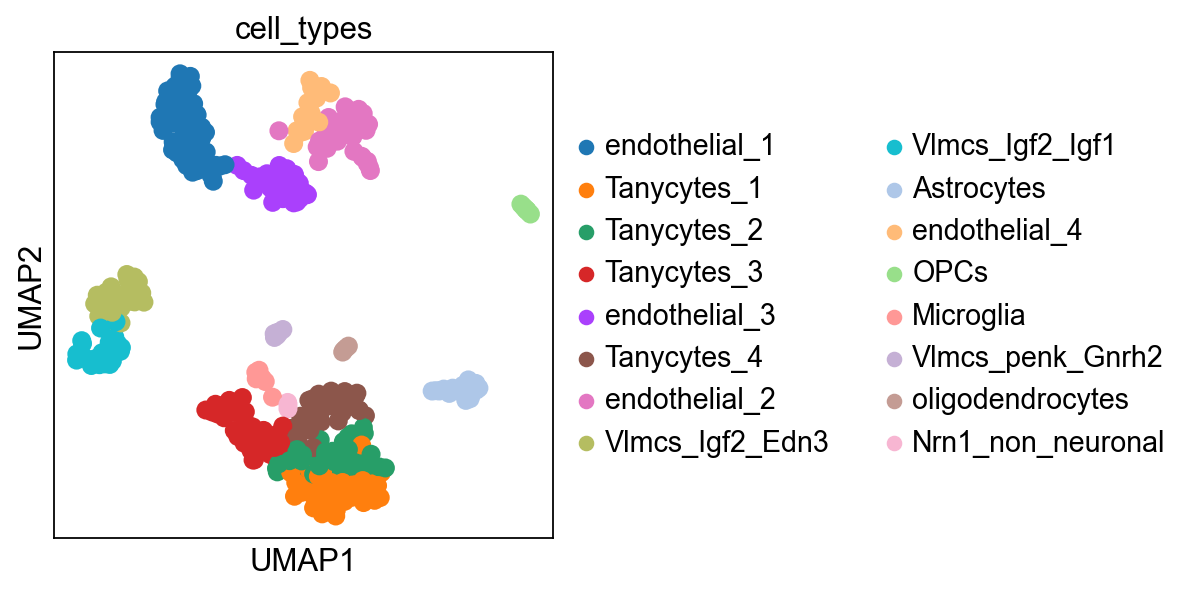

In [34]:
sc.pl.umap(adata_down_neuron, color=['cell_types'], use_raw=True,save="_tomcells_neuron_celltypes.pdf")
sc.pl.umap(adata_down_nonneuron, color=['cell_types'], use_raw=True,save="_tomcells_nonneuron_celltypes.pdf")

## Clustering the neighborhood graph

In [37]:
sc.tl.leiden(adata_down_neuron,resolution=1.5)

running Leiden clustering
    finished (0:00:00)


Plot the clusters, which agree quite well with the result of Seurat.

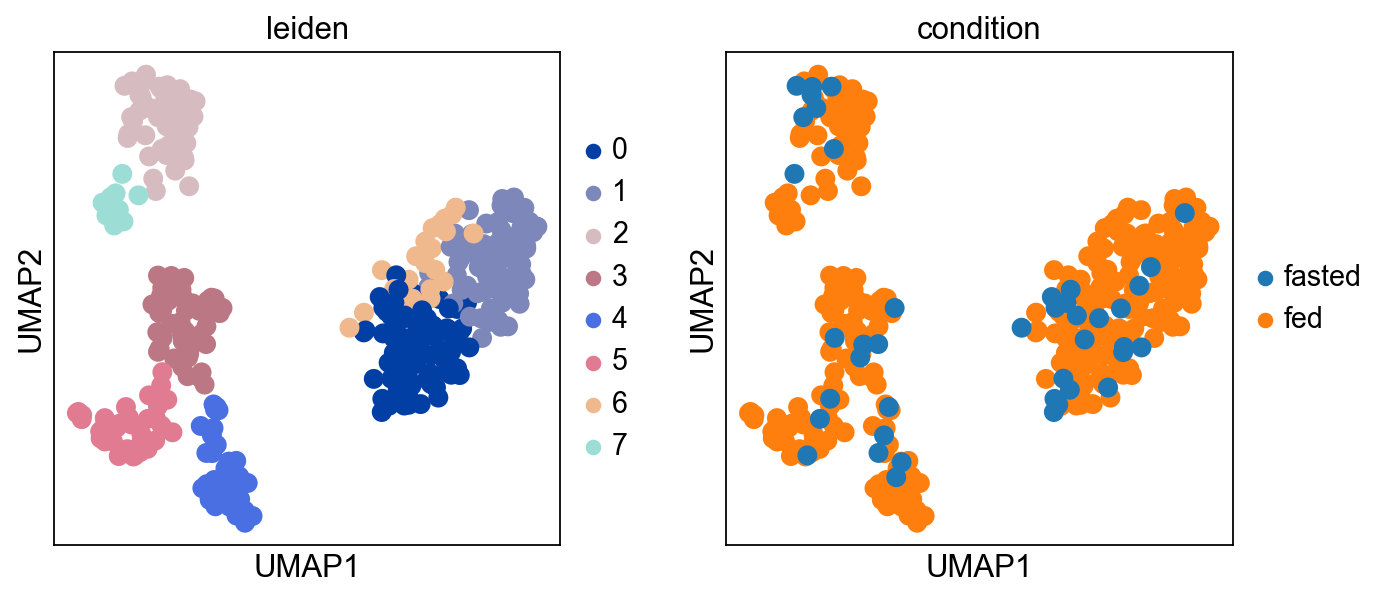

In [38]:
sc.pl.umap(adata_down_neuron, color=['leiden','condition'],save = "_tomcells_neuron_leiden_condition.pdf")


### Perform differential gene expression analysis to find marker genes

Let us compute a ranking for the highly differential genes in each cluster. For this, by default, the `.raw` attribute of AnnData is used in case it has been initialized before. The simplest and fastest method to do so is the t-test.
Here, I will use wilcoxon, but remember that alternatives exist
Importantly, try **scran** normalisation to increase the power of differential testing

ranking genes
    finished (0:00:02)


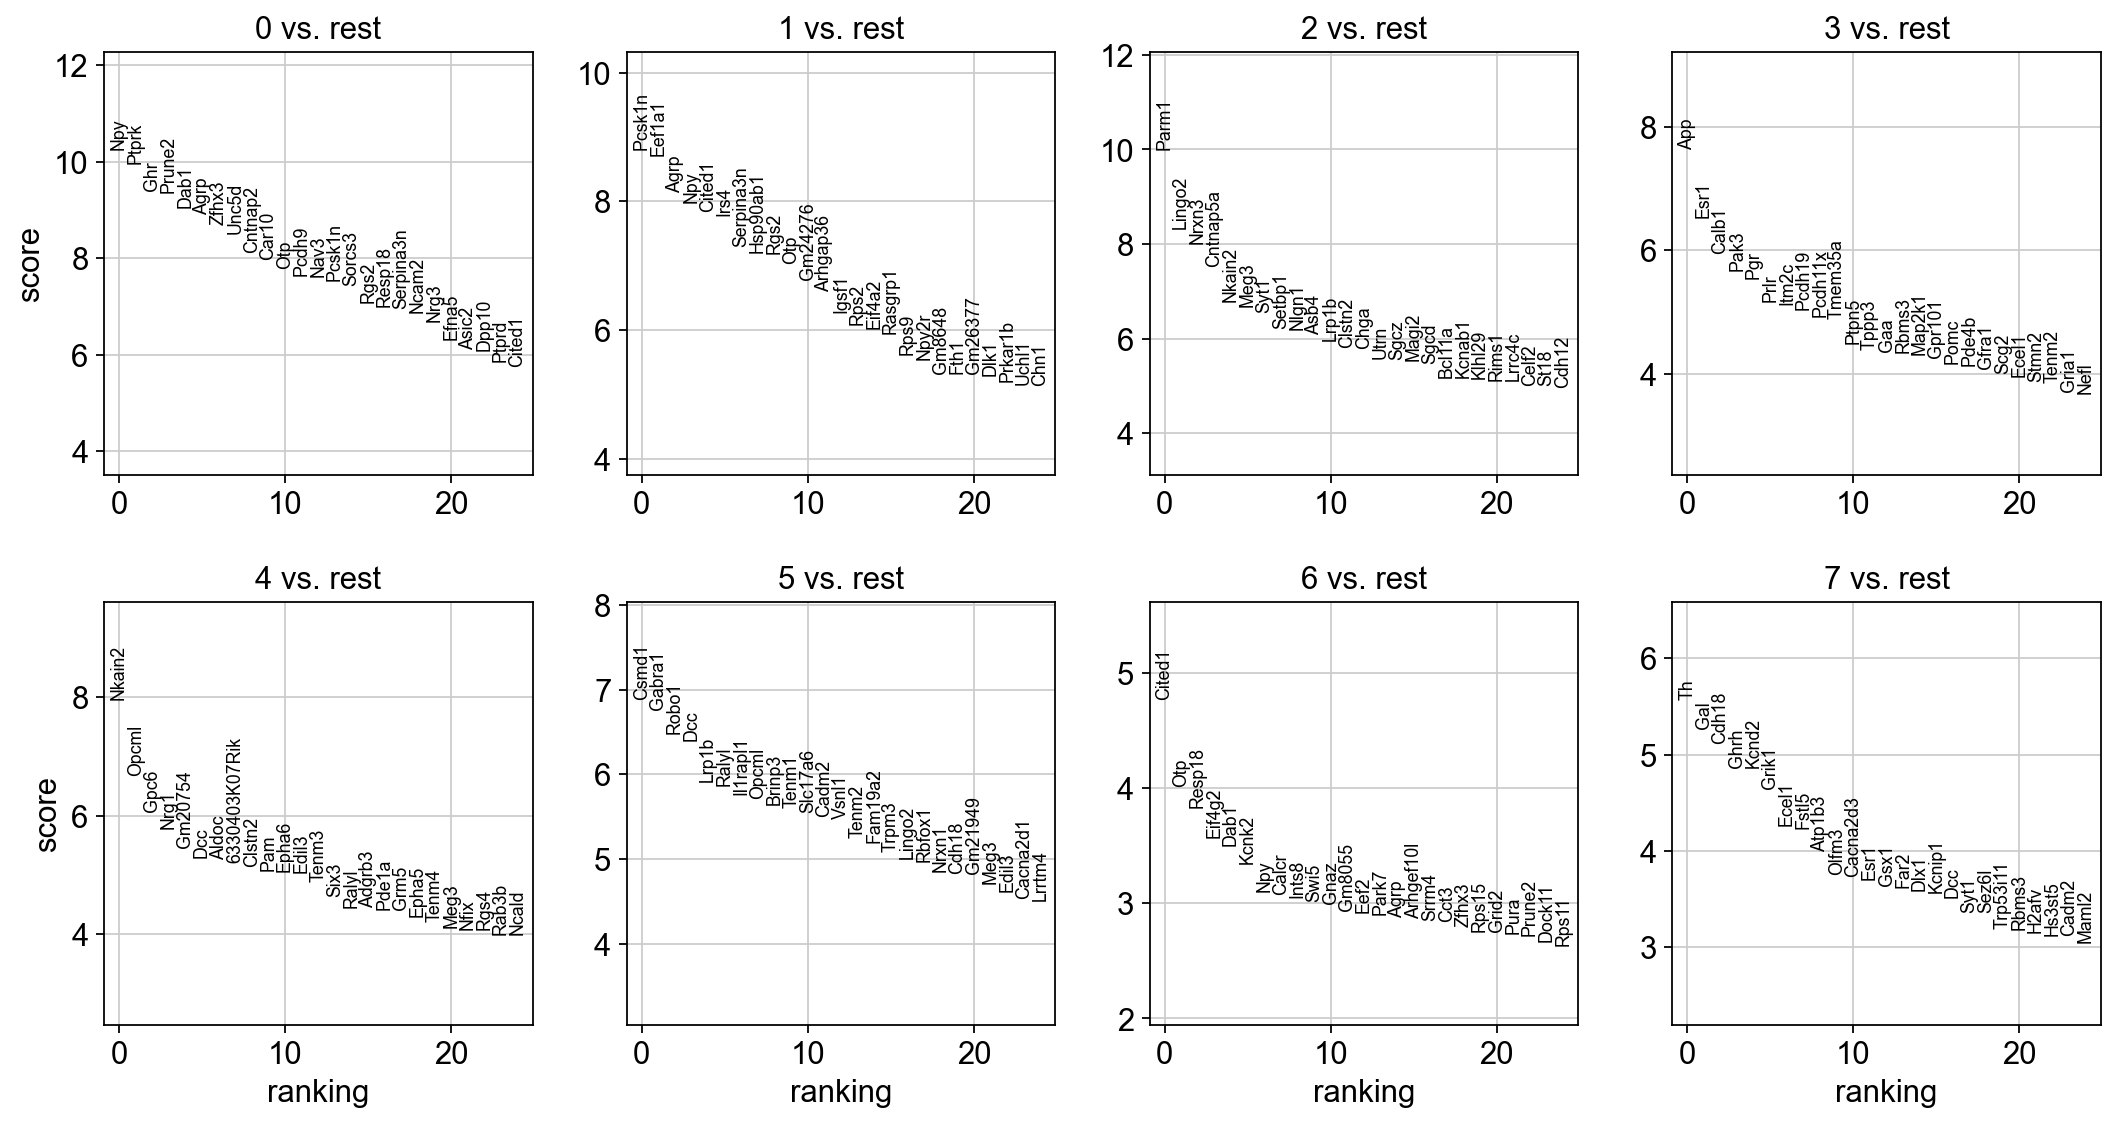

In [41]:
sc.tl.rank_genes_groups(adata_down_neuron, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_down_neuron, n_genes=25, sharey=False,save = "_tomcells_neuron_wilcoxon.pdf")

We can also perform logaritmic regression 'logrog' or overestimated t-test 't-test_overextimate'

In [42]:
#sc.tl.rank_genes_groups(adata_down_neuron, 'leiden', method='logreg')
#sc.pl.rank_genes_groups(adata_down_neuron, n_genes=25, sharey=False,save = "tomcells_neuron_logreg.pdf")

In [43]:
#sc.tl.rank_genes_groups(adata_down_neuron, 'leiden', method='t-test_overestim_var')
#sc.pl.rank_genes_groups(adata_down_neuron, n_genes=25, sharey=False,save = "tomcells_neuron_t-test_overestim_var.pdf")

###### Save the files

In [44]:
adata_down_neuron.write(results_file_neuron)

In [45]:
adata_down_nonneuron.write(results_file_nonneuron)

###### Now visualise and save the differential testing results 

Define a list of marker genes for later reference.

Show the 10 top ranked genes per cluster 0, 1, ..., 7 in a dataframe.

In [47]:
pd.DataFrame(adata_down_neuron.uns['rank_genes_groups']['names']).head(5)

0       1         2      3        4       5       6      7
0     Npy  Pcsk1n     Parm1    App   Nkain2   Csmd1  Cited1     Th
1   Ptprk  Eef1a1    Lingo2   Esr1    Opcml  Gabra1     Otp    Gal
2     Ghr    Agrp     Nrxn3  Calb1     Gpc6   Robo1  Resp18  Cdh18
3  Prune2     Npy  Cntnap5a   Pak3     Nrg1     Dcc  Eif4g2   Ghrh
4    Dab1  Cited1    Nkain2    Pgr  Gm20754   Lrp1b    Dab1  Kcnd2

Get a table with the scores and groups.

In [48]:
result = adata_down_neuron.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']}).head(5) #pvals

0_n        0_s       0_l           0_p     1_n       1_s       1_l  \
0     Npy  10.255712  2.294397  3.295993e-20  Pcsk1n  8.806604  1.040946   
1   Ptprk   9.955851  2.483497  3.512850e-19  Eef1a1  8.708243  1.084199   
2     Ghr   9.409716  1.991745  4.899696e-17    Agrp  8.132979  2.174136   
3  Prune2   9.363539  1.900786  5.695891e-17     Npy  7.980967  1.940930   
4    Dab1   9.053987  1.538178  8.145626e-16  Cited1  7.834319  1.666748   

            1_p       2_n        2_s  ...       5_l           5_p     6_n  \
0  3.811374e-14     Parm1  10.001517  ...  2.375034  1.674243e-07  Cited1   
1  4.559393e-14    Lingo2   8.334483  ...  3.232150  1.983606e-07     Otp   
2  4.125402e-12     Nrxn3   8.010567  ...  3.973909  6.643775e-07  Resp18   
3  8.579941e-12  Cntnap5a   7.524349  ...  2.599431  8.784410e-07  Eif4g2   
4  2.321357e-11    Nkain2   6.794677  ...  1.908385  1.431622e-05    Dab1   

        6_s       6_l       6_p    7_n       7_s       7_l       7_p  
0  4.772041  1.668637  0.053884     Th  5.576383  4.756073  0.000726  
1  4.012640  1.630581  0.887054    Gal  5.271573  6.078841  0.001998  
2  3.836591  0.790781  1.000000  Cdh18  5.119168  3.293950  0.003023  
3  3.574082  0.928693  1.000000   Ghrh  4.867428  7.229717  0.006774  
4  3.504288  1.085995  1.000000  Kcnd2  4.864707  1.963279  0.006774  

[5 rows x 32 columns]

Save the differential testing

In [50]:
os.makedirs('./write')
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']}).to_csv(
     './write/Lepr_hypothalamus_tomcells_neuron_g2000e2_rank_genes_groups.csv')

#### Save the fraction of positive cells as well as the mean per cluster

Here, I want to calculate the mean expression and the percentage of cells positive for each gene in each cluster

In [51]:
gene_ids = adata_down_neuron.raw.var.index.values
clusters = adata_down_neuron.obs['leiden'].cat.categories
obs = adata_down_neuron.raw[:,gene_ids].X
obs = pd.DataFrame(obs,columns=gene_ids,index=adata_down_neuron.obs['leiden'])
average_obs = obs.groupby(level=0).mean()
obs_bool = obs.astype(bool)
fraction_obs = obs_bool.groupby(level=0).sum()/obs_bool.groupby(level=0).count()
average_obs.T.add_suffix("_mean").to_csv("adata_down_neuron_raw_average.csv")
fraction_obs.T.add_suffix("_pct").to_csv("adata_down_neuron_raw_fraction.csv")
pd.concat([average_obs.T.add_suffix("_mean"), fraction_obs.T.add_suffix("_pct")], 
          axis=1).sort_index(axis=1,ascending=True).to_csv("adata_down_neuron_raw_average_fraction.csv")

Add these as new features to adata file

In [52]:
adata_down_neuron.uns['average_obs'] = average_obs.T.add_suffix("_mean")
adata_down_neuron.uns['fraction_obs'] = fraction_obs.T.add_suffix("_pct")
adata_down_neuron.uns['average_fraction_obs'] = pd.concat([average_obs.T.add_suffix("_mean"), fraction_obs.T.add_suffix("_pct")], 
          axis=1).sort_index(axis=1,ascending=True)

save the filtered data only

In [53]:
adata_down_neuron.uns['fraction_obs'].loc[adata_down_neuron.var.index.values,:].to_csv("adata_down_neuron_fraction.csv")
adata_down_neuron.uns['average_obs'].loc[adata_down_neuron.var.index.values,:].to_csv("adata_down_neuron_average.csv")
adata_down_neuron.uns['average_fraction_obs'].loc[adata_down_neuron.var.index.values,:].to_csv("adata_down_neuron_average_fraction.csv")

In [54]:
adata_down_neuron.uns['average_fraction_obs']

leiden       0_mean     0_pct    1_mean     1_pct    2_mean     2_pct  \
Gnai3       0.00000  0.000000  0.009120  0.013158  0.000000  0.000000   
Cdc45       0.00806  0.011628  0.000000  0.000000  0.013078  0.018868   
H19         0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
Scml2       0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
Apoh        0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
...             ...       ...       ...       ...       ...       ...   
AC150035.3  0.00000  0.000000  0.000000  0.000000  0.013078  0.018868   
AC164314.2  0.01612  0.023256  0.027361  0.039474  0.000000  0.000000   
AC109255.2  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
AC135964.2  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
AC110534.5  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   

leiden        3_mean     3_pct    4_mean    4_pct  5_mean  5_pct  6_mean  \
Gnai3       0.015068  0.021739  0.016906  0.02439     0.0    0.0     0.0   
Cdc45       0.000000  0.000000  0.016906  0.02439     0.0    0.0     0.0   
H19         0.000000  0.000000  0.000000  0.00000     0.0    0.0     0.0   
Scml2       0.000000  0.000000  0.000000  0.00000     0.0    0.0     0.0   
Apoh        0.000000  0.000000  0.000000  0.00000     0.0    0.0     0.0   
...              ...       ...       ...      ...     ...    ...     ...   
AC150035.3  0.000000  0.000000  0.000000  0.00000     0.0    0.0     0.0   
AC164314.2  0.015068  0.021739  0.033812  0.04878     0.0    0.0     0.0   
AC109255.2  0.000000  0.000000  0.000000  0.00000     0.0    0.0     0.0   
AC135964.2  0.000000  0.000000  0.000000  0.00000     0.0    0.0     0.0   
AC110534.5  0.000000  0.000000  0.000000  0.00000     0.0    0.0     0.0   

leiden      6_pct  7_mean  7_pct  
Gnai3         0.0     0.0    0.0  
Cdc45         0.0     0.0    0.0  
H19           0.0     0.0    0.0  
Scml2         0.0     0.0    0.0  
Apoh          0.0     0.0    0.0  
...           ...     ...    ...  
AC150035.3    0.0     0.0    0.0  
AC164314.2    0.0     0.0    0.0  
AC109255.2    0.0     0.0    0.0  
AC135964.2    0.0     0.0    0.0  
AC110534.5    0.0     0.0    0.0  

[29547 rows x 16 columns]

##### Combine the gene name, mean expression and fraction of marker positive cells for DEG for each cluster

In [55]:
test = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']}) #pvals

In [56]:
#Try to make a loop list(zip(lst, lst2)
#pd.concat(
df0 = pd.DataFrame(
{group: list(test.iloc[:,group*4])
for group in range(8)},
)
#df0.columns = df0.columns.astype(str)
df0 = df0.add_suffix('_gene')

df1 = pd.DataFrame(
{group: list(adata_down.uns['average_obs'].loc[test.iloc[:,group*4]].iloc[:,group])
for group in range(8)}
)
df1 = df1.add_suffix('_mean')

df2 = pd.DataFrame(
{group: list(adata_down.uns['fraction_obs'].loc[test.iloc[:,group*4]].iloc[:,group])
for group in range(8)}
)
df2 = df2.add_suffix('_pct')
#The following is a shortlist with name, mean and pct
pd.concat([df0,df1,df2],axis=1).sort_index(axis = 1).to_csv(
    "adata_down_neuron_raw_genename_average_fraction.csv")
#The following has all the features including name, mean and pct
pd.concat([test,df1,df2],axis=1).sort_index(axis = 1).to_csv(
    "adata_down_neuron_raw_allinfo_ordered.csv")
pd.concat([test,df1,df2],axis=1).to_csv(
    "adata_down_neuron_raw_allinfo.csv")

First calculate the diference between fed and fasted per cluster, then save the detailed list of percentages mean etc

###### Compare fed and fasted

In [57]:
clusters = ['0','1','2','3','4','5']
sc.settings.verbosity = 1

Trying to set attribute `.uns` of view, copying.


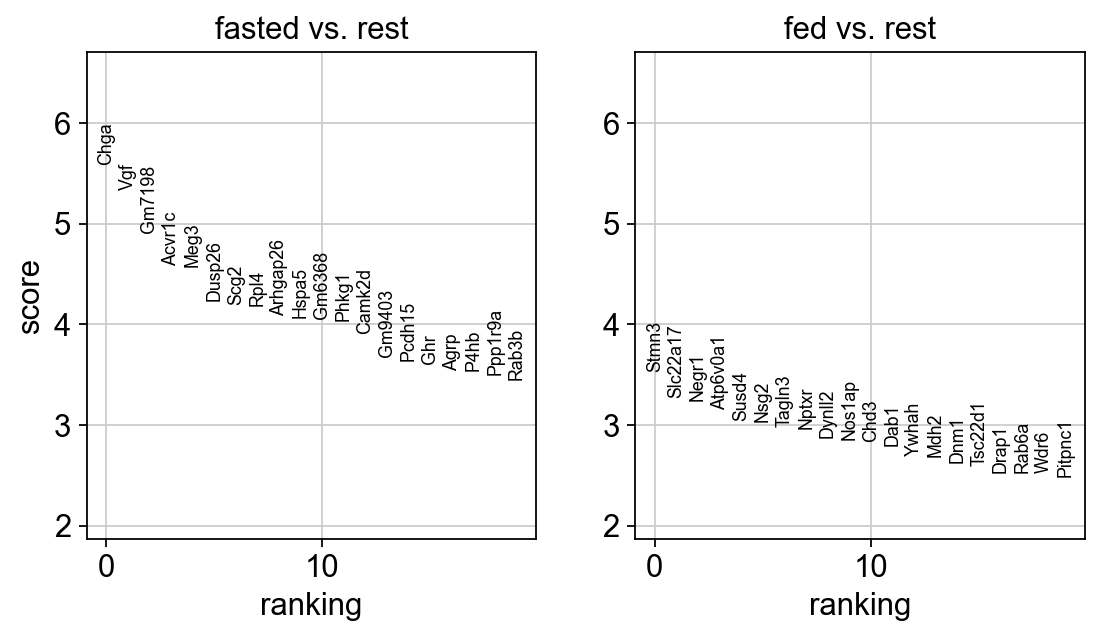

Trying to set attribute `.uns` of view, copying.


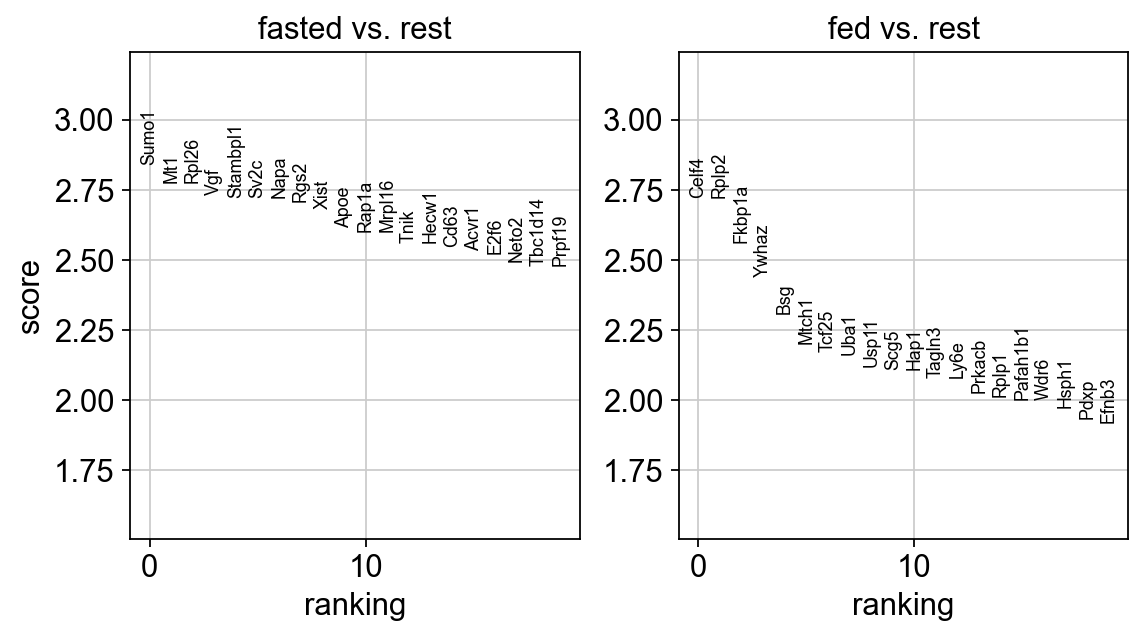

Trying to set attribute `.uns` of view, copying.


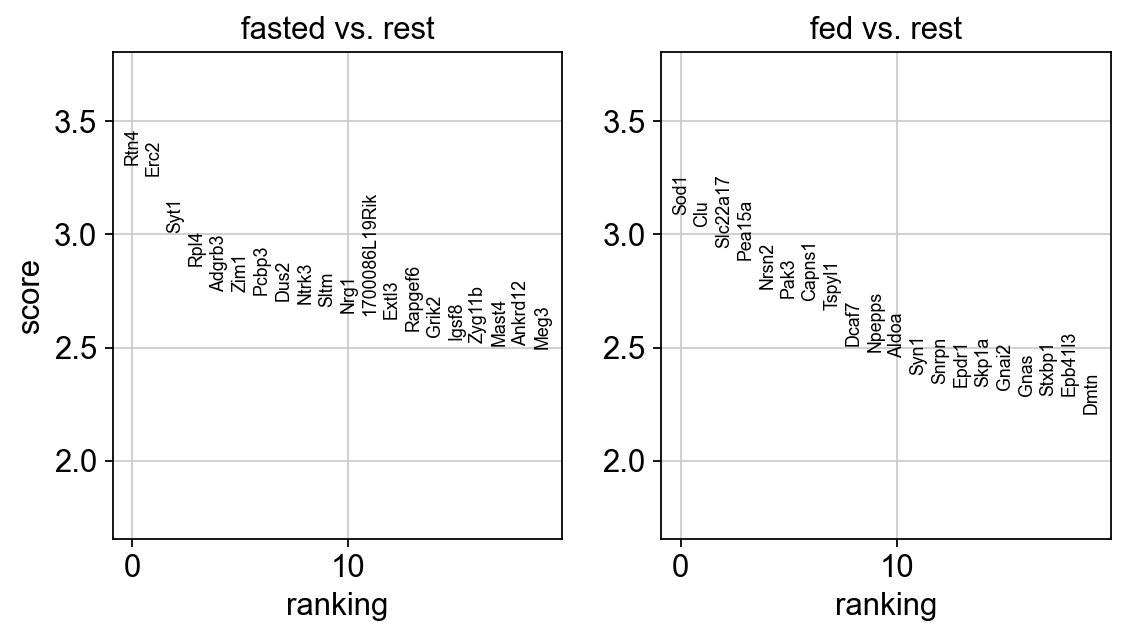

Trying to set attribute `.uns` of view, copying.


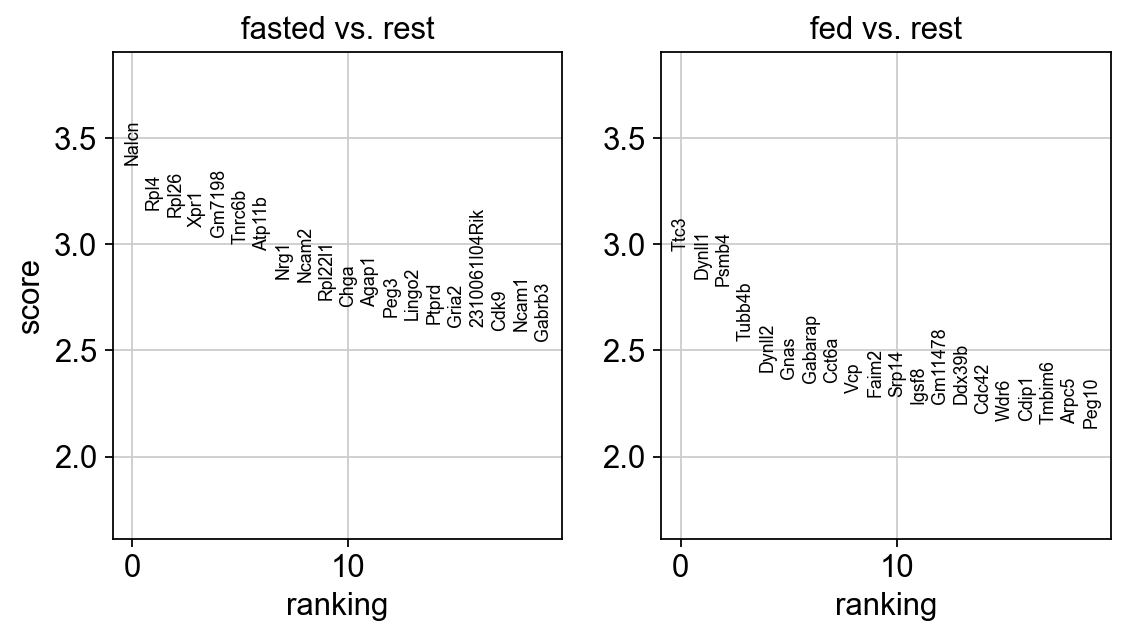

Trying to set attribute `.uns` of view, copying.


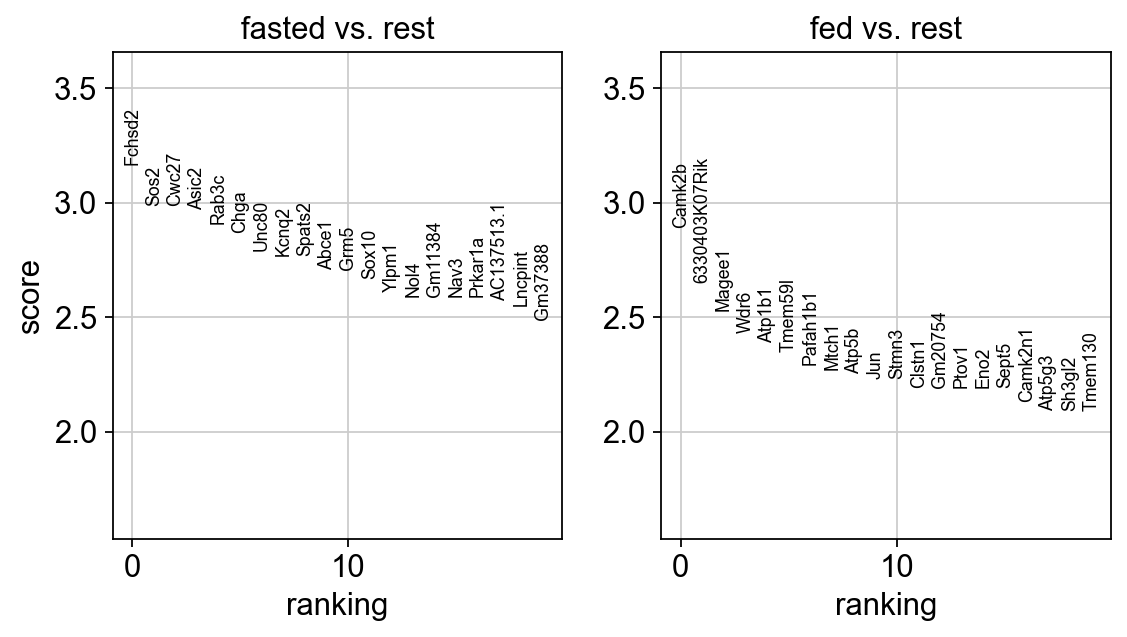

Trying to set attribute `.uns` of view, copying.


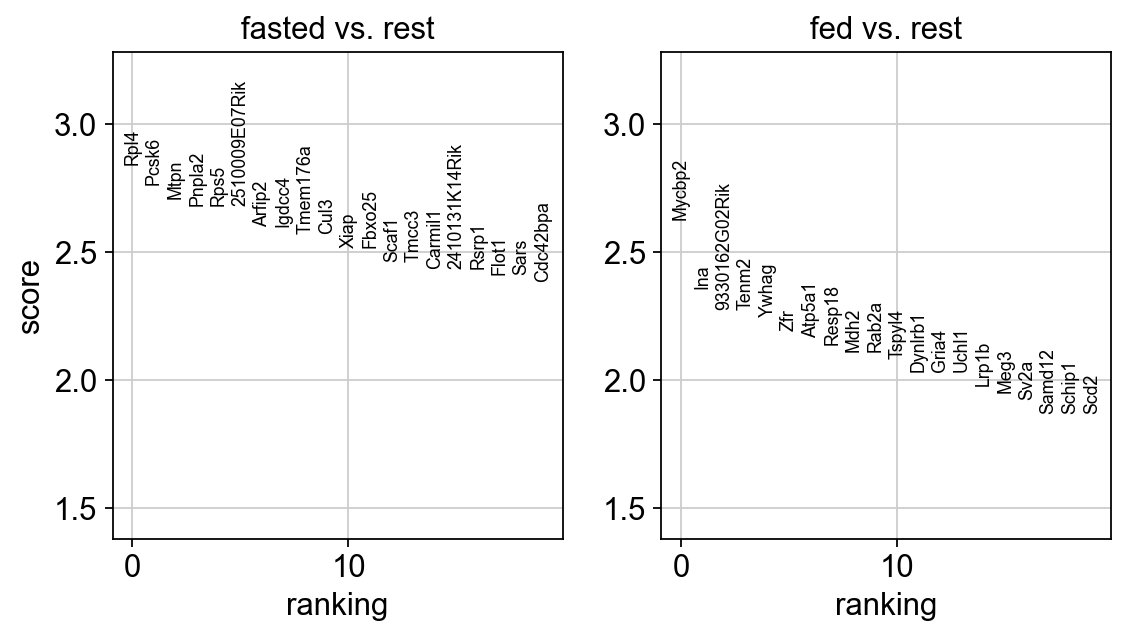

In [58]:
for i in range(6):
    cluster = adata_down_neuron[adata_down_neuron.obs['leiden']==clusters[i]]
    sc.tl.rank_genes_groups(cluster,'condition', method='wilcoxon')
    sc.pl.rank_genes_groups(cluster, n_genes=20,save= '_tomcells_neuron_' + clusters[i] + '_fasted.pdf')

Now save the differentially expressed genes, their mean expression, fraction as well as the test scores in a csv file

In [59]:
for i in range(6):
    cluster = adata_down_neuron[adata_down_neuron.obs['leiden']==clusters[i]]
    sc.tl.rank_genes_groups(cluster,'condition', method='wilcoxon')
    result = cluster.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    test = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']})
    gene_ids = adata_down_neuron.raw.var.index.values
    #recalculate the averages and pct
    obs = cluster.raw[:,gene_ids].X
    obs = pd.DataFrame(obs,columns=gene_ids,index=cluster.obs['condition'])
    average_obs = obs.groupby(level=0).mean()
    obs_bool = obs.astype(bool)
    fraction_obs = obs_bool.groupby(level=0).sum()/obs_bool.groupby(level=0).count()
    df0 = pd.concat([average_obs.T.add_suffix("_mean"), fraction_obs.T.add_suffix("_pct")], 
              axis=1).sort_index(axis=1,ascending=True)
    df1 = df0.loc[test.iloc[:,0]] #enriched in fasted
    df2 = df0.loc[test.iloc[:,4]] #enriched in fed
    df1.to_csv(
        'neurons_rank_genes_groups_fasted_enriched_' + clusters[i]+ '_mean_pct.csv')
    df2.to_csv(
        'neurons_rank_genes_groups_fed_enriched_' + clusters[i]+ '_mean_pct.csv')
    test.to_csv(
        'neurons_rank_genes_groups_fed_fasted_' + clusters[i]+ '_pvalue_logfold.csv')


Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


# Analyze Agrp neurons only

Subset Agrp neurons

In [60]:
adata_down_agrpneurons = adata_down_neuron[adata_down_neuron.
                            obs['cell_types'].isin(["Agrp_neurons_1",
                                                    "Agrp_neurons_2","Agrp_neurons_3"])]


In [61]:
adata_down_agrpneurons

View of AnnData object with n_obs × n_vars = 183 × 1980 
    obs: 'ERCC_genes', 'n_counts_withERCCmito', 'n_genes', 'n_counts_with_mito', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'type', 'plate', 'condition', 'chrY_counts', 'chrX_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'normalisation_factor', 'n_counts_down', 'leiden', 'leiden_condition', 'leiden_cluster_numbers', 'cell_types'
    var: 'fullname', 'ENS_names', 'geneid', 'feature', 'chr', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'd

## Computing the neighborhood graph

In [62]:
sc.pp.neighbors(adata_down_agrpneurons, n_neighbors=10) #knn  , n_pcs=40

## Embedding the neighborhood graph

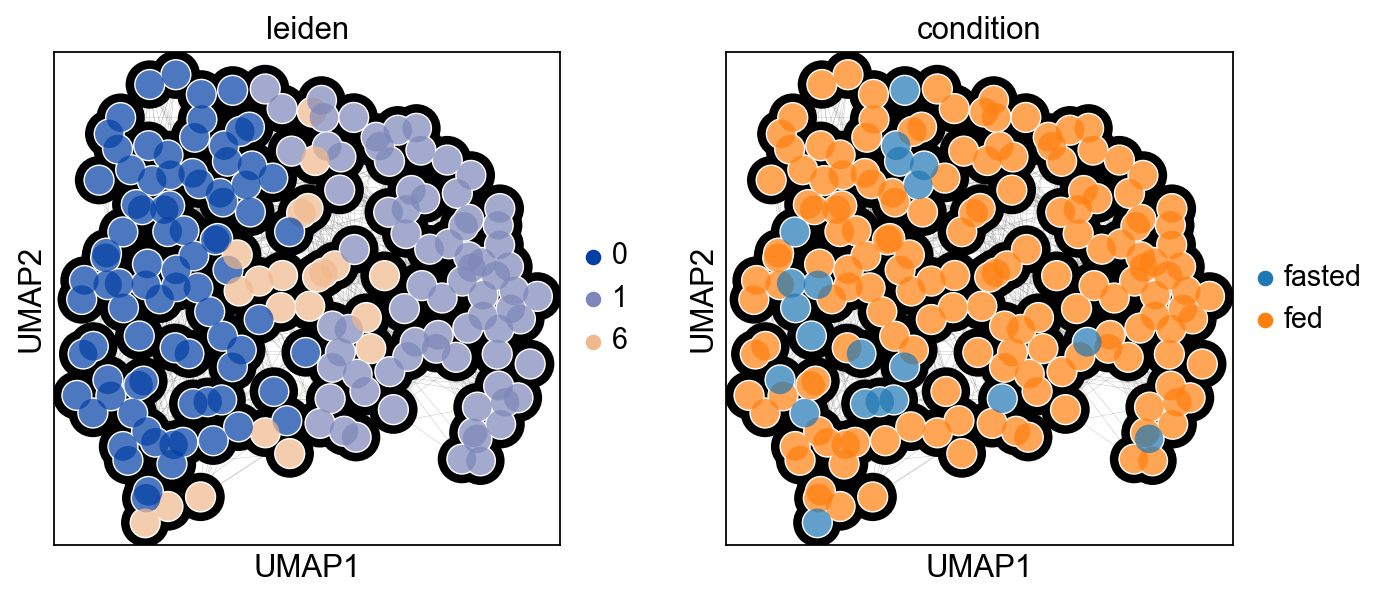

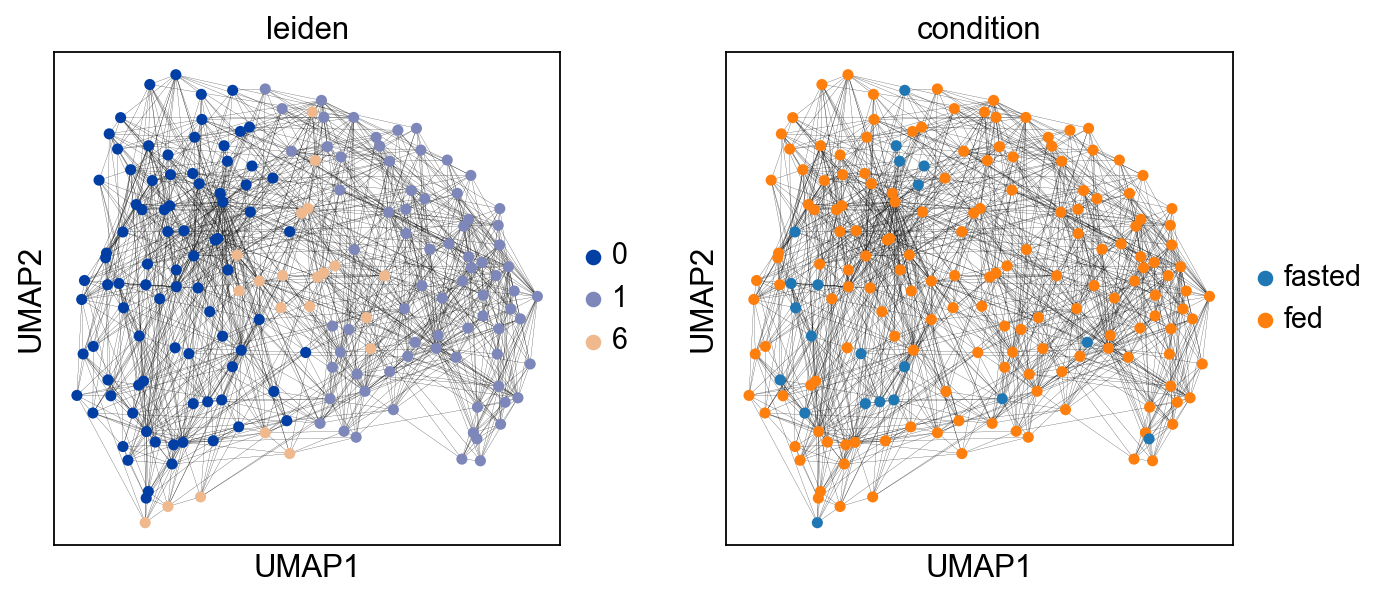

In [63]:
sc.tl.umap(adata_down_agrpneurons,spread = 2,maxiter =100,min_dist=0.5,gamma=2)
sc.pl.umap(adata_down_agrpneurons, color=['leiden','condition'], add_outline=True,
                          use_raw=True,edges=True,save='_agrpneurons_leiden_lined.pdf')
sc.pl.umap(adata_down_agrpneurons, color=['leiden','condition'], add_outline=False,
                          s=100,edges_color='black',
           use_raw=True,edges=True,save='_agrpneurons_leiden_connection.pdf')


Plot main stats for neuronal cells

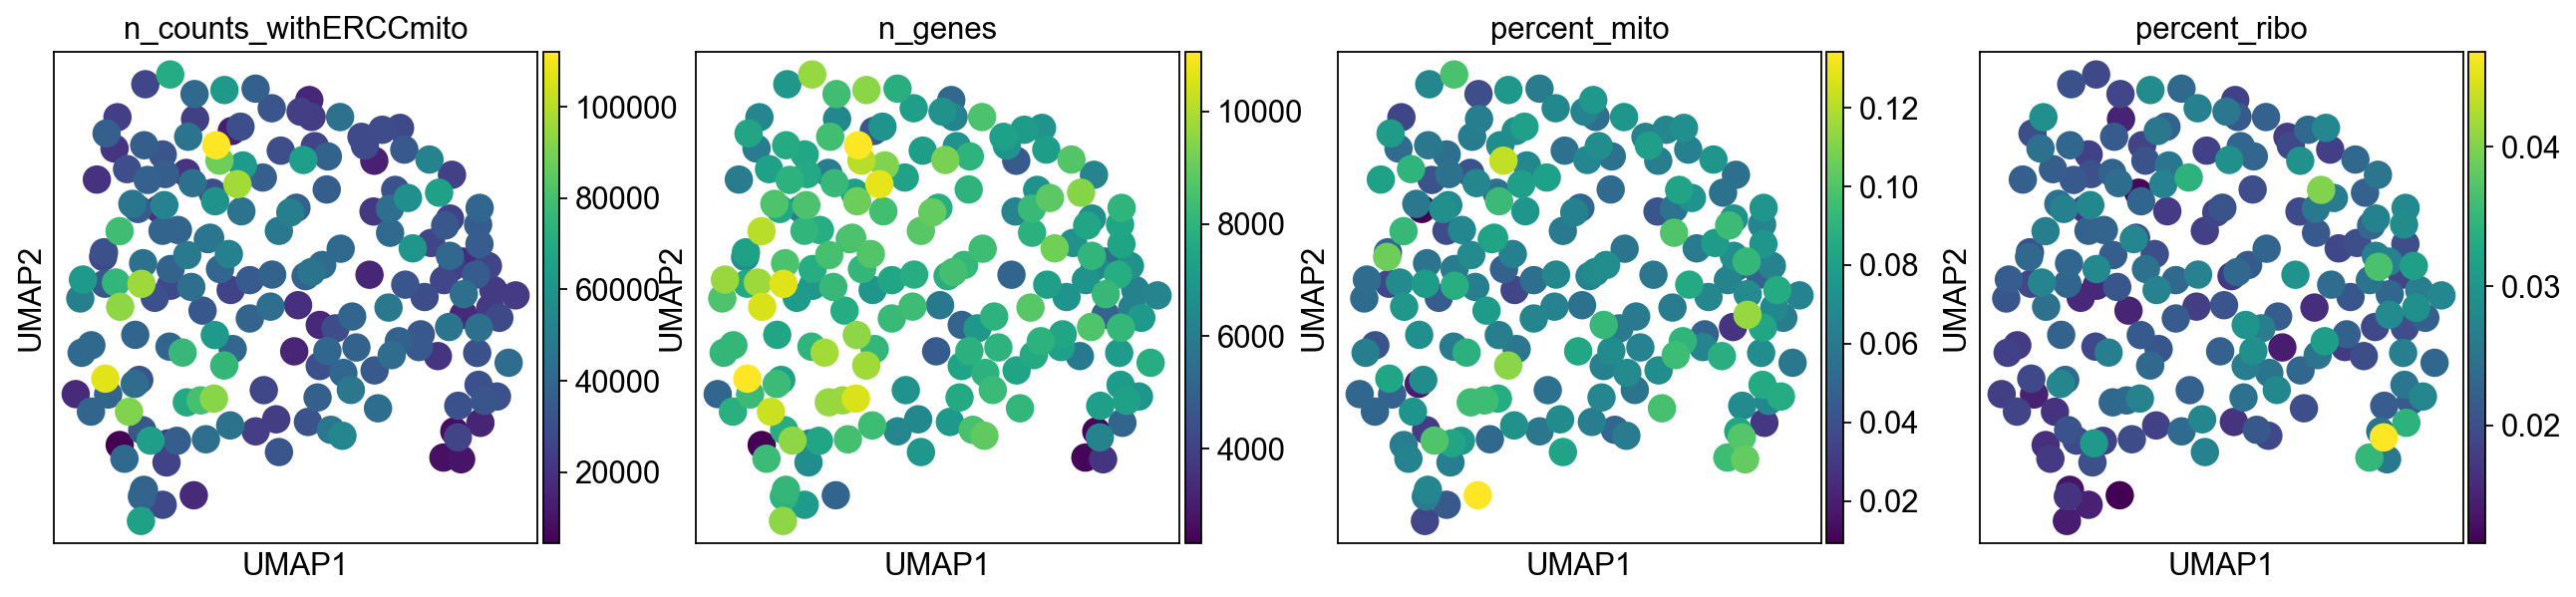

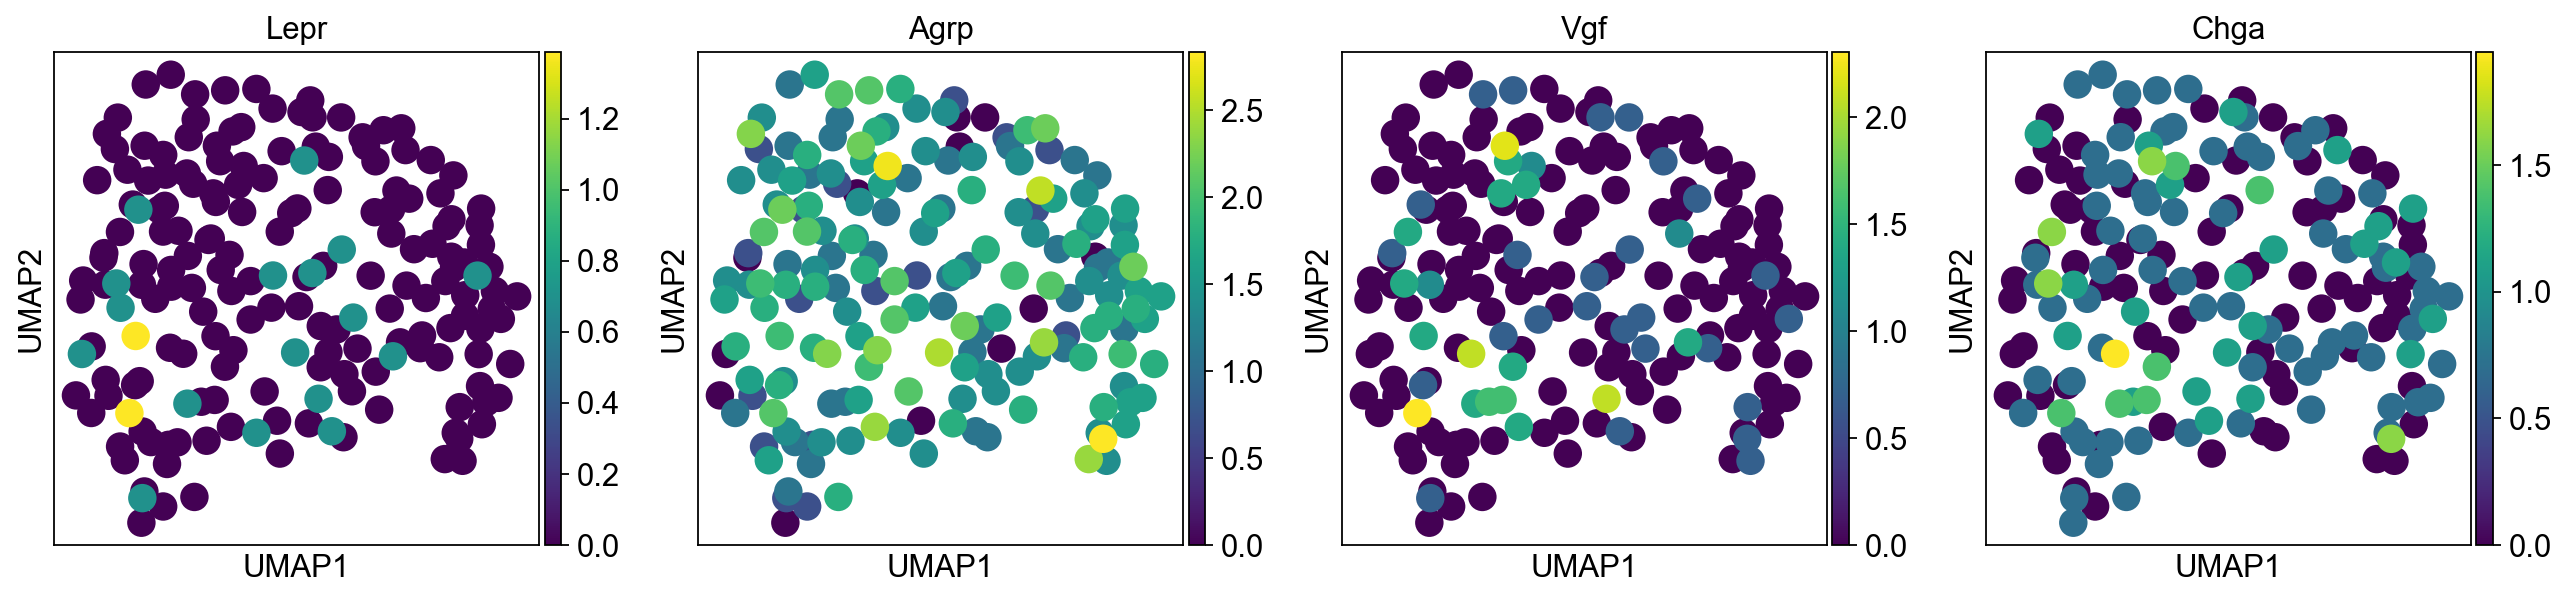

In [64]:
sc.pl.umap(adata_down_agrpneurons, color=['n_counts_withERCCmito','n_genes','percent_mito','percent_ribo'],
                          use_raw=True, save="_tomcells_agrpneurons_umap_stats.pdf")
sc.pl.umap(adata_down_agrpneurons, color=['Lepr','Agrp','Vgf','Chga'],
           use_raw=True, save="_tomcells_agrpneurons_markers_1.pdf")

## Clustering the neighborhood graph

In [65]:
sc.tl.leiden(adata_down_agrpneurons,resolution=1)

Plot the clusters, which agree quite well with the results of Seurat (not included)

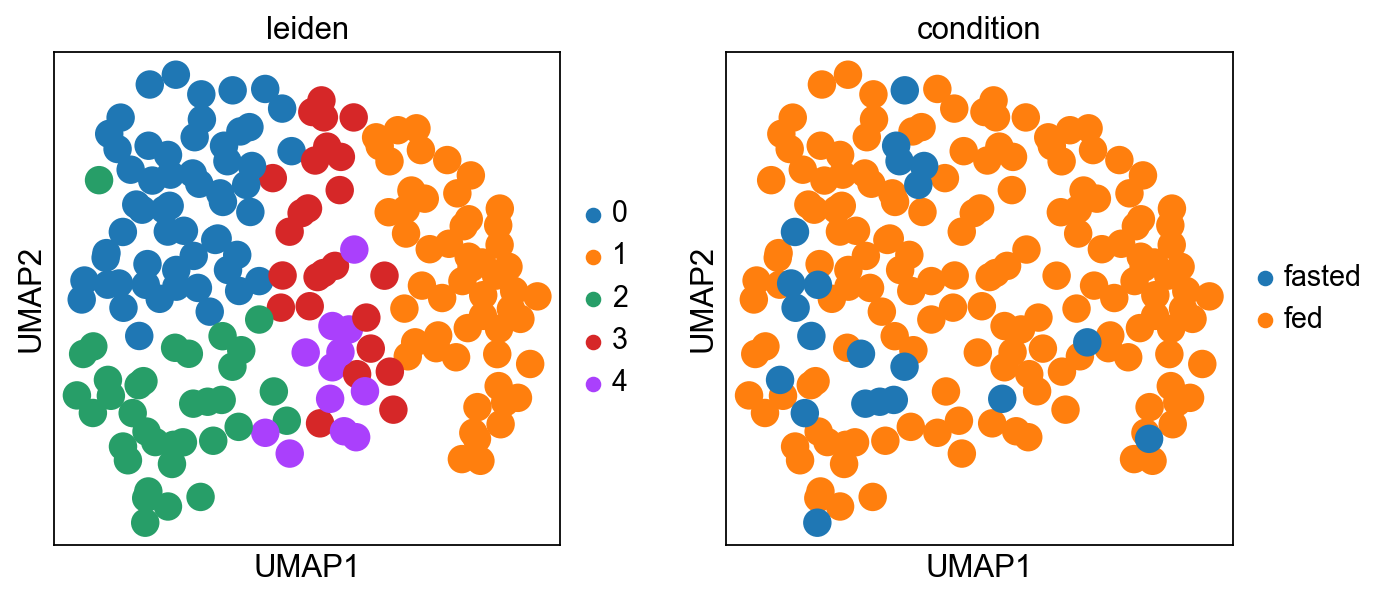

In [66]:
sc.pl.umap(adata_down_agrpneurons, color=['leiden','condition'],
           save = "_tomcells_agrpneuron_leiden_condition.pdf")

Let us compute a ranking for the highly differential genes in each cluster. For this, by default, the `.raw` attribute of AnnData is used in case it has been initialized before. The simplest and fastest method to do so is the t-test.
Here, I will use wilcoxon, but remember that alternatives exist
Importantly, try **scran** normalisation to increase the power of differential testing

### Perform differential gene expression analysis to find marker genes

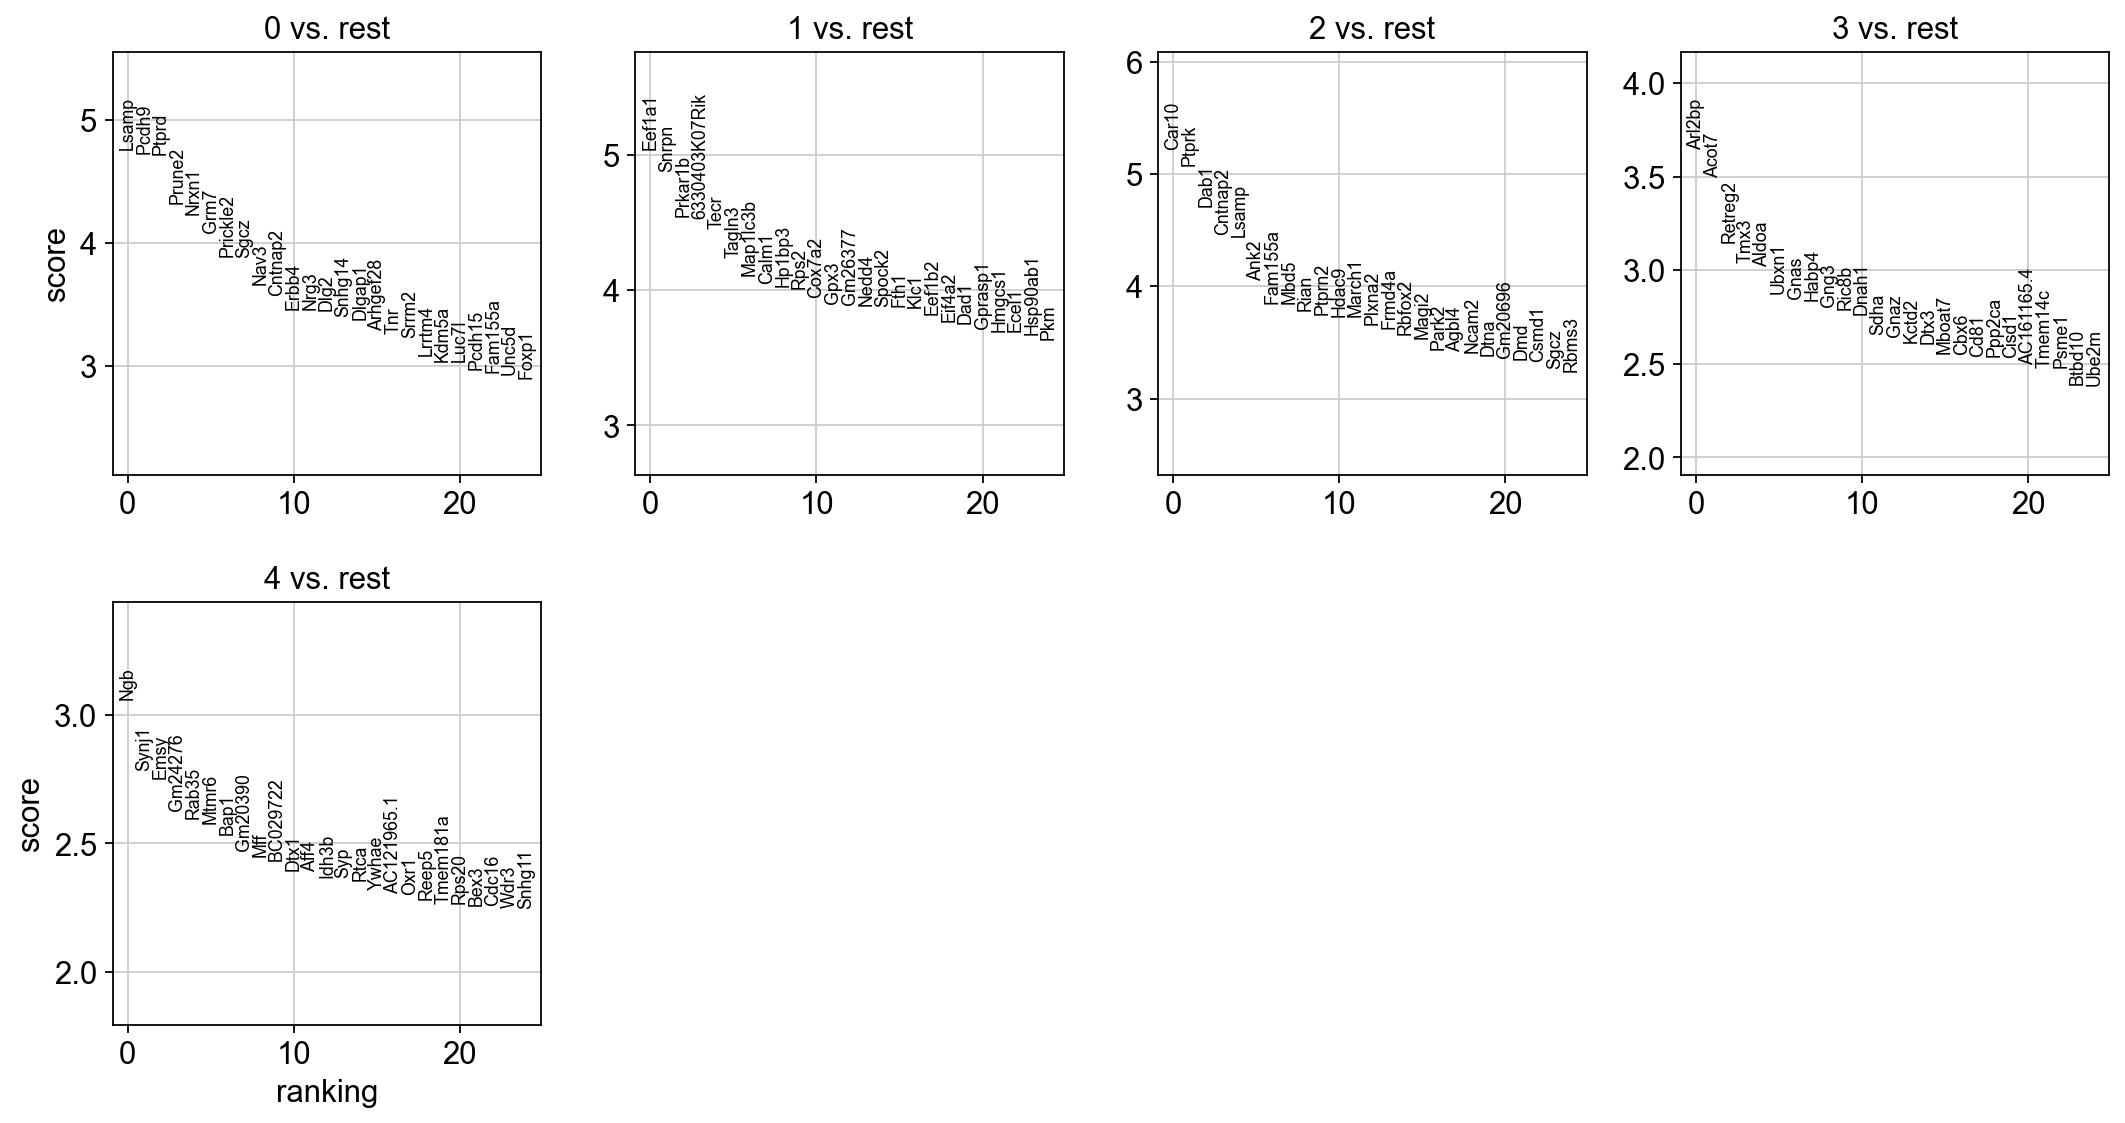

In [69]:
sc.tl.rank_genes_groups(adata_down_agrpneurons, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_down_agrpneurons, 
                        n_genes=25, sharey=False,save = "_tomcells_agrpneuron_wilcoxon.pdf")

###### Save the files

In [70]:
adata_down_agrpneurons.write(results_file_agrpneurons)

###### Now visualise at and save the differential testing results 

Show the 10 top ranked genes per cluster 0, 1, ..., 7 in a dataframe.

In [72]:
pd.DataFrame(adata_down_agrpneurons.uns['rank_genes_groups']['names']).head(5)

0              1        2        3        4
0   Lsamp         Eef1a1    Car10   Arl2bp      Ngb
1   Pcdh9          Snrpn    Ptprk    Acot7    Synj1
2   Ptprd        Prkar1b     Dab1  Retreg2     Emsy
3  Prune2  6330403K07Rik  Cntnap2     Tmx3  Gm24276
4   Nrxn1           Tecr    Lsamp    Aldoa    Rab35

Get a table with the scores and groups.

In [73]:
result = adata_down_agrpneurons.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']}).head(5) #pvals

0_n       0_s       0_l       0_p            1_n       1_s       1_l  \
0   Lsamp  4.762703  0.622469  0.017122         Eef1a1  5.039455  0.639722   
1   Pcdh9  4.729556  0.700723  0.017122          Snrpn  4.874227  0.733335   
2   Ptprd  4.723529  0.848656  0.017122        Prkar1b  4.540711  0.682044   
3  Prune2  4.321238  0.805483  0.091688  6330403K07Rik  4.530002  0.632008   
4   Nrxn1  4.230835  0.664403  0.114655           Tecr  4.455038  0.626757   

        1_p      2_n       2_s       2_l       2_p      3_n       3_s  \
0  0.001582    Car10  5.219507  1.291416  0.005301   Arl2bp  3.646848   
1  0.002483    Ptprk  5.072254  1.154402  0.005808    Acot7  3.498536   
2  0.008481     Dab1  4.710330  0.934633  0.024358  Retreg2  3.149088   
3  0.008481  Cntnap2  4.460177  1.042258  0.051702     Tmx3  3.041410   
4  0.011265    Lsamp  4.445984  0.659379  0.051702    Aldoa  3.019062   

        3_l  3_p      4_n       4_s       4_l  4_p  
0  1.414532  1.0      Ngb  3.061208  1.732233  1.0  
1  0.999130  1.0    Synj1  2.784966  0.861357  1.0  
2  1.152991  1.0     Emsy  2.753960  2.692752  1.0  
3  1.387577  1.0  Gm24276  2.629933  0.503726  1.0  
4  0.615785  1.0    Rab35  2.598926  2.366020  1.0

Save the differential testing

In [74]:
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']}).to_csv(
     './write/Lepr_hypothalamus_tomcells_agrpneurons_g2000e2_rank_genes_groups.csv')

#### Save the fraction of positive cells as well as the mean per cluster

Here, I want to calculate the mean expression and the percentage of cells positive for each gene in each cluster

In [75]:
gene_ids = adata_down_agrpneurons.raw.var.index.values
clusters = adata_down_agrpneurons.obs['leiden'].cat.categories
obs = adata_down_agrpneurons.raw[:,gene_ids].X
obs = pd.DataFrame(obs,columns=gene_ids,index=adata_down_agrpneurons.obs['leiden'])
average_obs = obs.groupby(level=0).mean()
obs_bool = obs.astype(bool)
fraction_obs = obs_bool.groupby(level=0).sum()/obs_bool.groupby(level=0).count()
average_obs.T.add_suffix("_mean").to_csv("adata_down_agrpneurons_raw_average.csv")
fraction_obs.T.add_suffix("_pct").to_csv("adata_down_agrpneurons_raw_fraction.csv")
pd.concat([average_obs.T.add_suffix("_mean"), fraction_obs.T.add_suffix("_pct")], 
          axis=1).sort_index(axis=1,ascending=True).to_csv("adata_down_agrpneurons_raw_average_fraction.csv")

Add these as new features to adata file

In [76]:
adata_down_agrpneurons.uns['average_obs'] = average_obs.T.add_suffix("_mean")
adata_down_agrpneurons.uns['fraction_obs'] = fraction_obs.T.add_suffix("_pct")
adata_down_agrpneurons.uns['average_fraction_obs'] = pd.concat([average_obs.T.add_suffix("_mean"), fraction_obs.T.add_suffix("_pct")], 
          axis=1).sort_index(axis=1,ascending=True)

save the filtered data only

In [77]:
adata_down_agrpneurons.uns['fraction_obs'].loc[adata_down_neuron.var.index.values,:].to_csv("adata_down_agrpneurons_fraction.csv")
adata_down_agrpneurons.uns['average_obs'].loc[adata_down_neuron.var.index.values,:].to_csv("adata_down_agrpneurons_average.csv")
adata_down_agrpneurons.uns['average_fraction_obs'].loc[adata_down_neuron.var.index.values,:].to_csv("adata_down_agrpneurons_average_fraction.csv")

In [78]:
adata_down_agrpneurons.uns['average_fraction_obs']

leiden        0_mean     0_pct    1_mean     1_pct  2_mean  2_pct  3_mean  \
Gnai3       0.000000  0.000000  0.012836  0.018519     0.0    0.0     0.0   
Cdc45       0.012160  0.017544  0.000000  0.000000     0.0    0.0     0.0   
H19         0.000000  0.000000  0.000000  0.000000     0.0    0.0     0.0   
Scml2       0.000000  0.000000  0.000000  0.000000     0.0    0.0     0.0   
Apoh        0.000000  0.000000  0.000000  0.000000     0.0    0.0     0.0   
...              ...       ...       ...       ...     ...    ...     ...   
AC150035.3  0.000000  0.000000  0.000000  0.000000     0.0    0.0     0.0   
AC164314.2  0.024321  0.035088  0.025672  0.037037     0.0    0.0     0.0   
AC109255.2  0.000000  0.000000  0.000000  0.000000     0.0    0.0     0.0   
AC135964.2  0.000000  0.000000  0.000000  0.000000     0.0    0.0     0.0   
AC110534.5  0.000000  0.000000  0.000000  0.000000     0.0    0.0     0.0   

leiden      3_pct    4_mean     4_pct  
Gnai3         0.0  0.000000  0.000000  
Cdc45         0.0  0.000000  0.000000  
H19           0.0  0.000000  0.000000  
Scml2         0.0  0.000000  0.000000  
Apoh          0.0  0.000000  0.000000  
...           ...       ...       ...  
AC150035.3    0.0  0.000000  0.000000  
AC164314.2    0.0  0.057762  0.083333  
AC109255.2    0.0  0.000000  0.000000  
AC135964.2    0.0  0.000000  0.000000  
AC110534.5    0.0  0.000000  0.000000  

[29547 rows x 10 columns]

##### Combine the gene name, mean expression and fraction of marker positive cells for DEG for each cluster

In [79]:
test = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']}) #pvals

In [80]:
#Try to make a loop list(zip(lst, lst2)
#pd.concat(
df0 = pd.DataFrame(
{group: list(test.iloc[:,group*4])
for group in range(5)},
)
#df0.columns = df0.columns.astype(str)
df0 = df0.add_suffix('_gene')

df1 = pd.DataFrame(
{group: list(adata_down.uns['average_obs'].loc[test.iloc[:,group*4]].iloc[:,group])
for group in range(5)}
)
df1 = df1.add_suffix('_mean')

df2 = pd.DataFrame(
{group: list(adata_down.uns['fraction_obs'].loc[test.iloc[:,group*4]].iloc[:,group])
for group in range(5)}
)
df2 = df2.add_suffix('_pct')
#The following is a shortlist with name, mean and pct
pd.concat([df0,df1,df2],axis=1).sort_index(axis = 1).to_csv(
    "adata_down_agrpneurons_raw_genename_average_fraction.csv")
#The following has all the features including name, mean and pct
pd.concat([test,df1,df2],axis=1).sort_index(axis = 1).to_csv(
    "adata_down_agrpneurons_raw_allinfo_ordered.csv")
pd.concat([test,df1,df2],axis=1).to_csv(
    "adata_down_agrpneurons_raw_allinfo.csv")

###### First calculate the diference between fed and fasted per cluster, then save the detailed list of percentages mean etc

###### Compare fed and fasted

ranking genes
    finished (0:00:00)


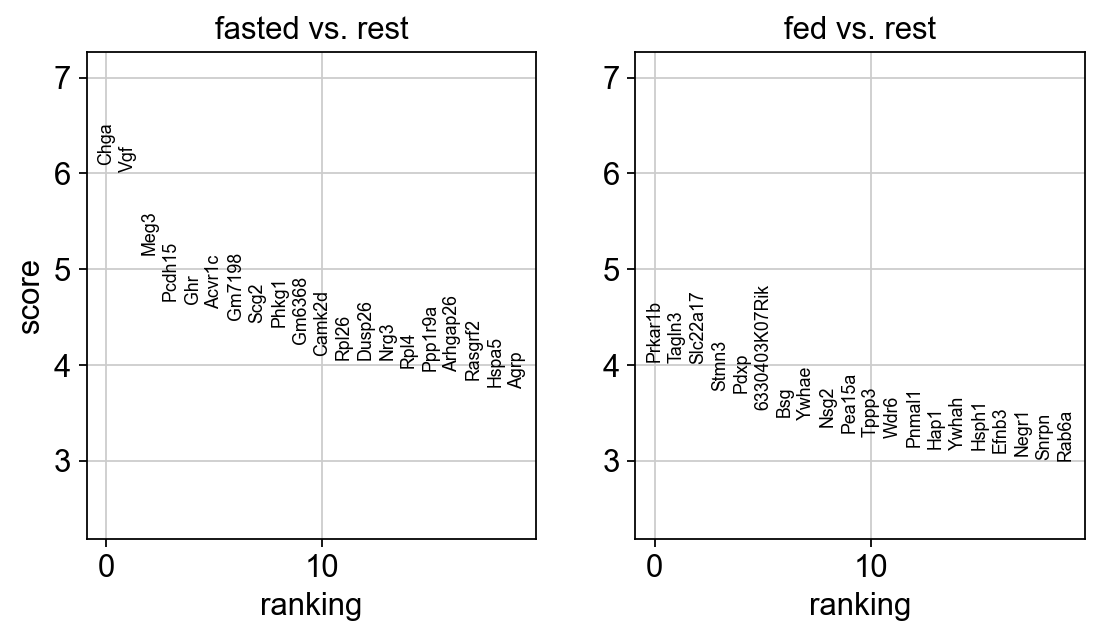

In [81]:
sc.tl.rank_genes_groups(adata_down_agrpneurons,'condition', method='wilcoxon')
sc.pl.rank_genes_groups(adata_down_agrpneurons, 
                        n_genes=20,save= '_tomcells_agrpneurons_fasted_versus_fed.pdf')

In [82]:
result = adata_down_agrpneurons.uns['rank_genes_groups']
groups = result['names'].dtype.names
cluster = adata_down_agrpneurons
test = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']})
gene_ids = cluster.raw.var.index.values
#recalculate the averages and pct
obs = cluster.raw[:,gene_ids].X
obs = pd.DataFrame(obs,columns=gene_ids,index=cluster.obs['condition'])
average_obs = obs.groupby(level=0).mean()
obs_bool = obs.astype(bool)
fraction_obs = obs_bool.groupby(level=0).sum()/obs_bool.groupby(level=0).count()
df0 = pd.concat([average_obs.T.add_suffix("_mean"), fraction_obs.T.add_suffix("_pct")], 
              axis=1).sort_index(axis=1,ascending=True)
df1 = df0.loc[test.iloc[:,0]] #enriched in fasted
df2 = df0.loc[test.iloc[:,4]] #enriched in fed
df1.to_csv(
        'agrpneurons_all_rank_genes_groups_fasted_enriched_mean_pct.csv')
df2.to_csv(
        'agrpneurons_all_rank_genes_groups_fed_enriched_mean_pct.csv')
test.to_csv(
        'agrpneurons_all_rank_genes_groups_fed_fasted_pvalue_logfold.csv')


In [83]:
test[1:10]

fasted_n  fasted_s  fasted_l  fasted_p          fed_n     fed_s     fed_l  \
1      Vgf  6.018099  4.234836  0.000026         Tagln3  4.017174  1.824797   
2     Meg3  5.144609  1.160432  0.002640       Slc22a17  4.008417  1.254696   
3   Pcdh15  4.673933  2.536987  0.021141          Stmn3  3.730389  1.118153   
4      Ghr  4.634527  1.217977  0.021141           Pdxp  3.708497  1.660033   
5   Acvr1c  4.584176  1.712036  0.022445  6330403K07Rik  3.531173  0.818643   
6   Gm7198  4.472527  1.936995  0.032629            Bsg  3.452361  1.245355   
7     Scg2  4.441878  1.060891  0.032936          Ywhae  3.423902  0.642331   
8    Phkg1  4.400283  1.938936  0.035492           Nsg2  3.349469  1.166254   
9   Gm6368  4.216391  2.440556  0.073349         Pea15a  3.288172  0.667812   

      fed_p  
1  0.106242  
2  0.106242  
3  0.235372  
4  0.236936  
5  0.421526  
6  0.497556  
7  0.536442  
8  0.629558  
9  0.726714

In [84]:
df1[1:10]

condition  fasted_mean  fasted_pct  fed_mean   fed_pct
Vgf           1.264354    0.857143  0.126585  0.166667
Meg3          2.064899    1.000000  1.406092  0.950617
Pcdh15        1.054187    0.857143  0.279254  0.308642
Ghr           1.614448    1.000000  1.004424  0.858025
Acvr1c        0.880617    0.952381  0.358445  0.444444
Gm7198        0.962274    0.809524  0.352390  0.425926
Scg2          2.029741    1.000000  1.427778  0.938272
Phkg1         0.690665    0.857143  0.230727  0.314815
Gm6368        0.643959    0.714286  0.154033  0.222222

ranking genes
    finished (0:00:00)


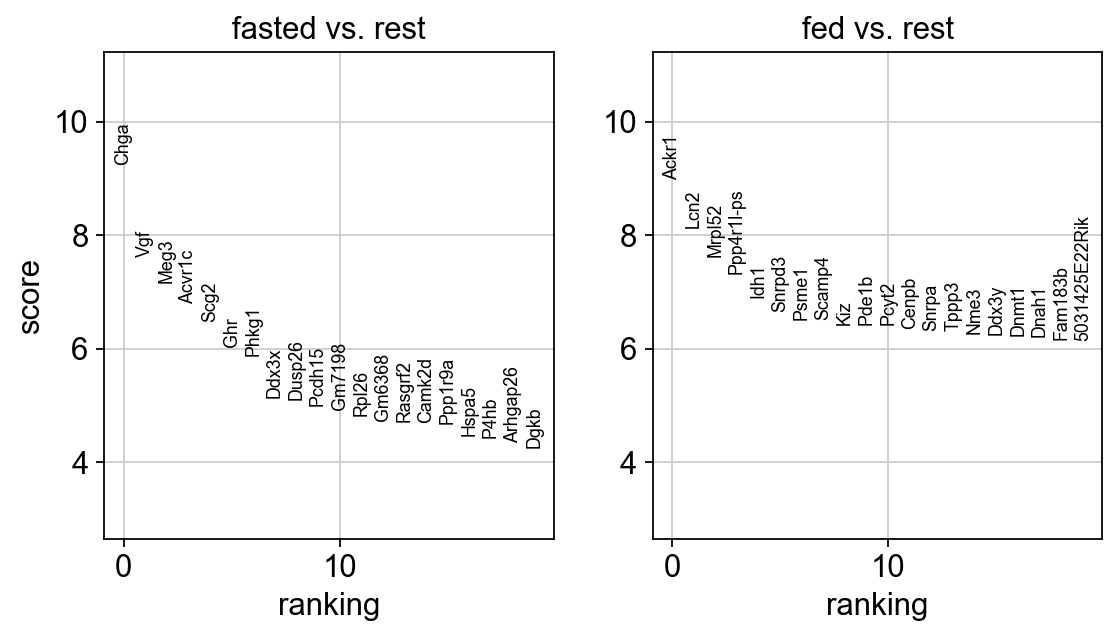

In [85]:
sc.tl.rank_genes_groups(adata_down_agrpneurons,'condition', method='t-test')
sc.pl.rank_genes_groups(adata_down_agrpneurons, 
                        n_genes=20,save= '_tomcells_agrpneurons_fasted_versus_fed_t-test.pdf')

In [86]:
result = adata_down_agrpneurons.uns['rank_genes_groups']
groups = result['names'].dtype.names
cluster = adata_down_agrpneurons
test = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']})
test[1:10] #28 genes

fasted_n  fasted_s  fasted_l  fasted_p       fed_n     fed_s      fed_l  \
1      Vgf  7.620490  4.234836  0.000103        Lcn2  8.135589  28.134544   
2     Meg3  7.158310  1.160432  0.000033      Mrpl52  7.616011  27.708305   
3   Acvr1c  6.787818  1.712036  0.000093  Ppp4r1l-ps  7.312940  27.558990   
4     Scg2  6.479246  1.060891  0.000107        Idh1  6.896503  27.489166   
5      Ghr  6.030589  1.217977  0.000541      Snrpd3  6.656033  27.409460   
6    Phkg1  5.871245  1.938936  0.001033       Psme1  6.501698   3.530836   
7    Ddx3x  5.136898  1.182809  0.002965      Scamp4  6.500822  27.248869   
8   Dusp26  5.093993  1.606855  0.003924         Kiz  6.417635  27.176180   
9   Pcdh15  5.000058  2.536987  0.006313       Pde1b  6.417635  27.176180   

          fed_p  
1  1.546573e-09  
2  2.069133e-08  
3  8.574632e-08  
4  6.805799e-07  
5  2.068699e-06  
6  1.671742e-05  
7  3.530992e-06  
8  3.973067e-06  
9  3.973067e-06

ranking genes
    finished (0:00:00)


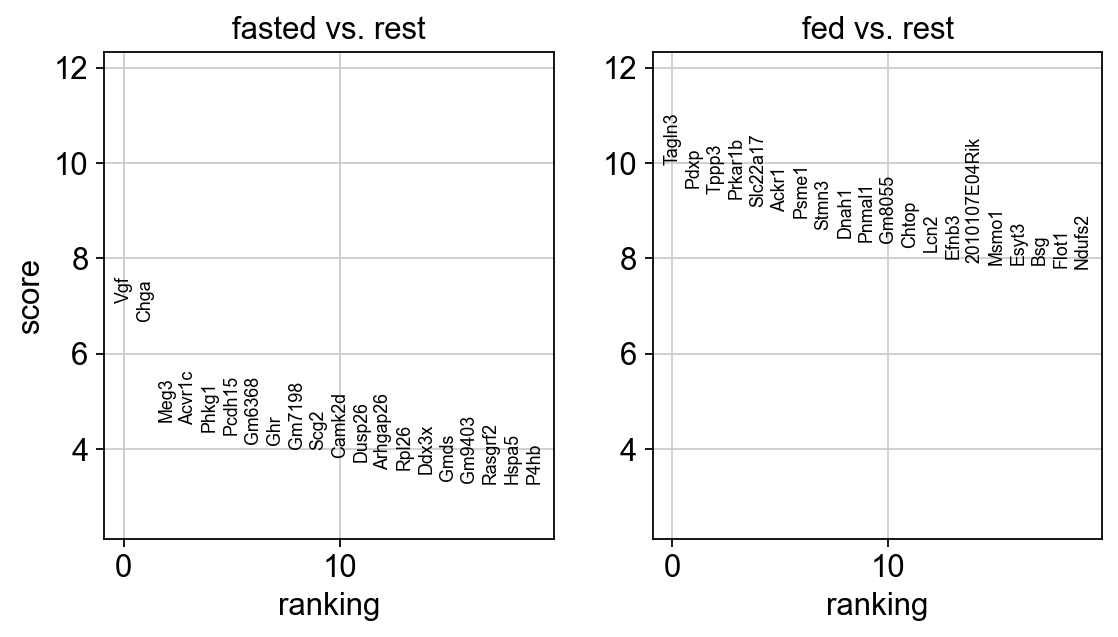

In [87]:
sc.tl.rank_genes_groups(adata_down_agrpneurons,'condition', method='t-test_overestim_var')
sc.pl.rank_genes_groups(adata_down_agrpneurons, 
                        n_genes=20,save= '_tomcells_agrpneurons_fasted_versus_fed_t-test_overestim_var.pdf')

In [88]:
result = adata_down_agrpneurons.uns['rank_genes_groups']
groups = result['names'].dtype.names
cluster = adata_down_agrpneurons
test = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']})
test[1:10] #28 genes

fasted_n  fasted_s  fasted_l  fasted_p     fed_n     fed_s      fed_l  \
1     Chga  6.674621  2.238635  0.001653      Pdxp  9.473144   1.660033   
2     Meg3  4.576904  1.160432  0.461582     Tppp3  9.362304   2.972790   
3   Acvr1c  4.513687  1.712036  0.461582   Prkar1b  9.258197   1.092205   
4    Phkg1  4.353868  1.938936  0.534346  Slc22a17  9.073911   1.254696   
5   Pcdh15  4.304762  2.536987  0.649677     Ackr1  8.979519  28.341759   
6   Gm6368  4.109335  2.440556  0.890980     Psme1  8.858799   3.530836   
7      Ghr  4.093013  1.217977  0.890980     Stmn3  8.589766   1.118153   
8   Gm7198  4.007286  1.936995  0.904280     Dnah1  8.433124   3.469039   
9     Scg2  3.980859  1.060891  1.000000    Pnmal1  8.339855   2.299716   

          fed_p  
1  1.273723e-15  
2  1.153731e-14  
3  5.163985e-15  
4  1.596431e-14  
5  6.760613e-13  
6  4.053078e-13  
7  4.150422e-13  
8  5.066301e-12  
9  3.168159e-12

###### Compare fed and fasted in each cluster... Noter that there is very few cells

In [89]:
clusters = ['0','1','2']
sc.settings.verbosity = 1

Trying to set attribute `.uns` of view, copying.


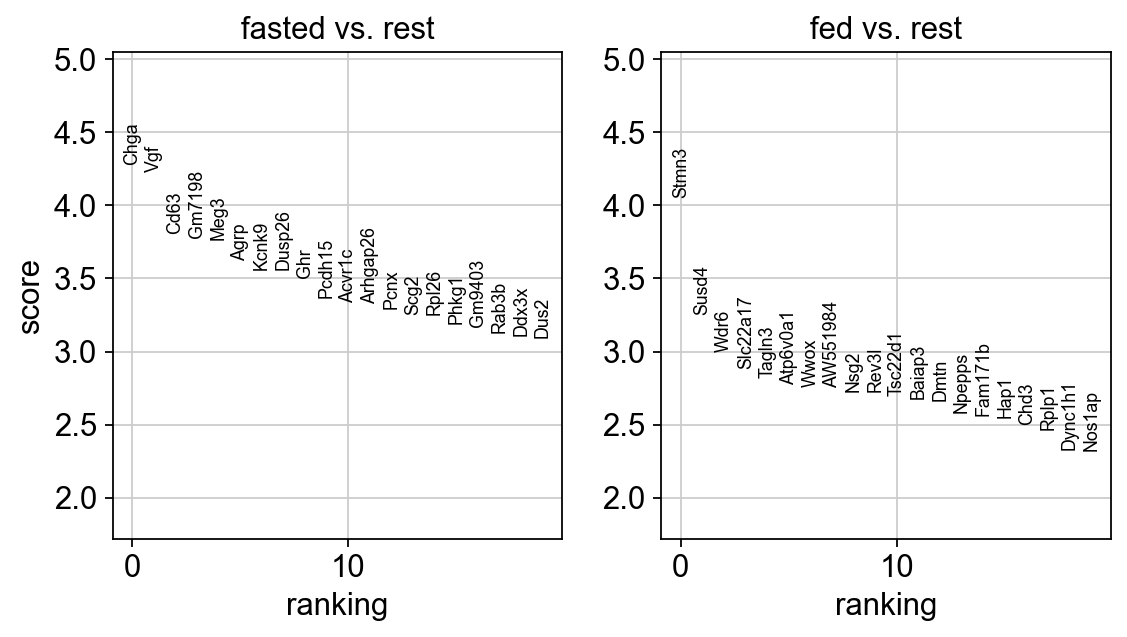

Trying to set attribute `.uns` of view, copying.


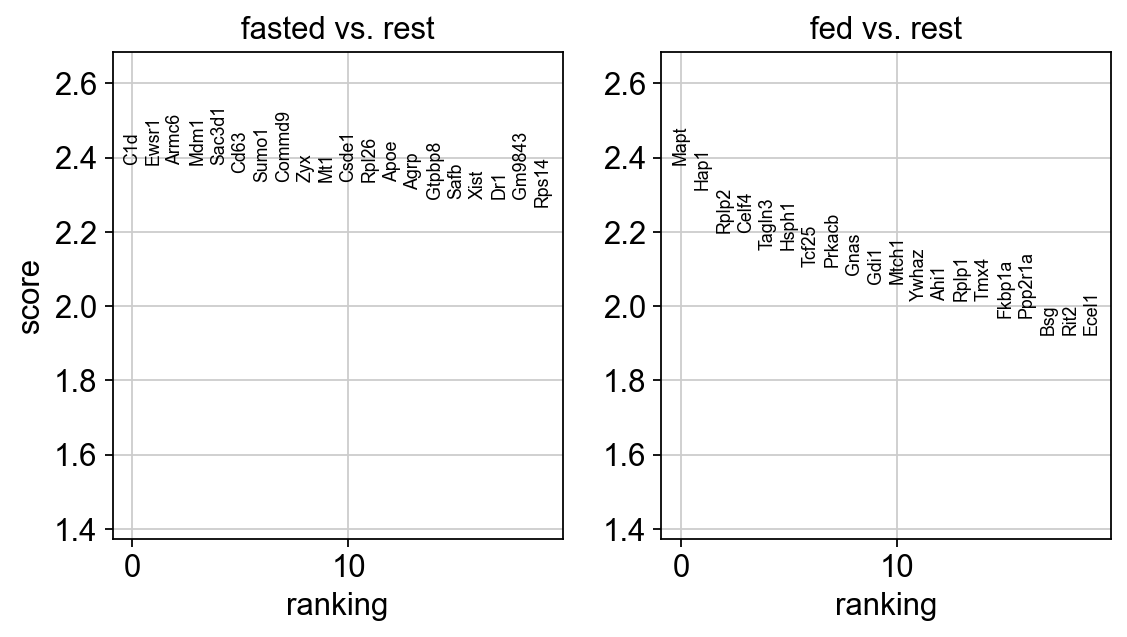

Trying to set attribute `.uns` of view, copying.


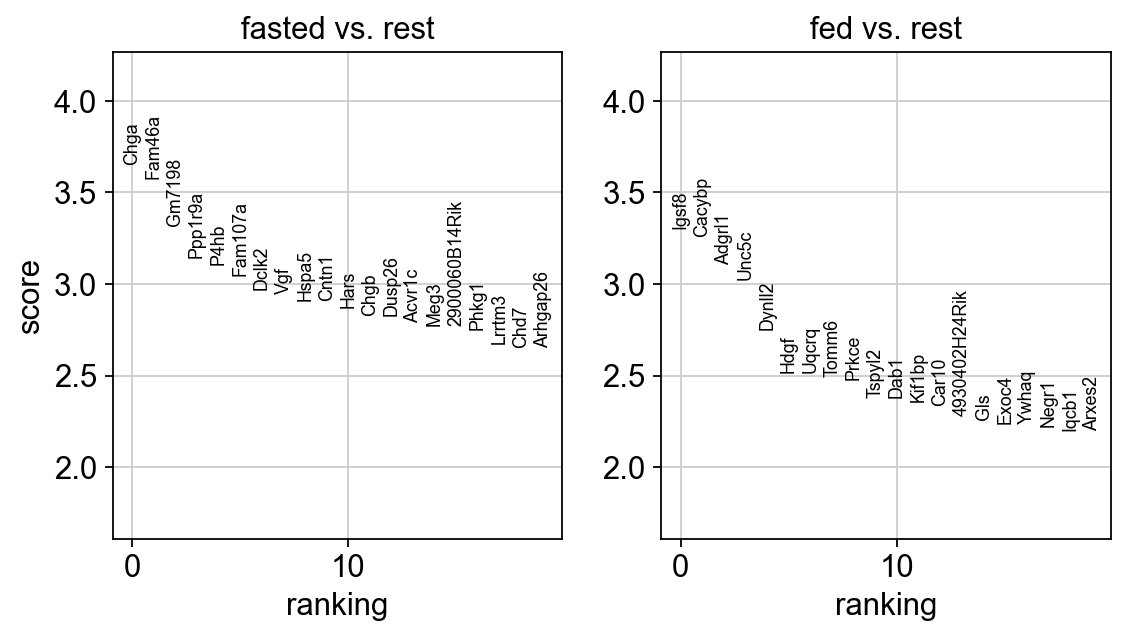

In [90]:
for i in range(3):
    cluster = adata_down_agrpneurons[adata_down_agrpneurons.obs['leiden']==clusters[i]]
    sc.tl.rank_genes_groups(cluster,'condition', method='wilcoxon')
    sc.pl.rank_genes_groups(cluster, n_genes=20,save= '_tomcells_agrpneurons_' + clusters[i] + '_fasted.pdf')

Now save the differentially expressed genes, their mean expression, fraction as well as the test scores in a csv file

In [91]:
for i in range(3):
    cluster = adata_down_agrpneurons[adata_down_agrpneurons.obs['leiden']==clusters[i]]
    sc.tl.rank_genes_groups(cluster,'condition', method='wilcoxon')
    result = cluster.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    test = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores','logfoldchanges','pvals_adj']})
    gene_ids = adata_down_neuron.raw.var.index.values
    #recalculate the averages and pct
    obs = cluster.raw[:,gene_ids].X
    obs = pd.DataFrame(obs,columns=gene_ids,index=cluster.obs['condition'])
    average_obs = obs.groupby(level=0).mean()
    obs_bool = obs.astype(bool)
    fraction_obs = obs_bool.groupby(level=0).sum()/obs_bool.groupby(level=0).count()
    df0 = pd.concat([average_obs.T.add_suffix("_mean"), fraction_obs.T.add_suffix("_pct")], 
              axis=1).sort_index(axis=1,ascending=True)
    df1 = df0.loc[test.iloc[:,0]] #enriched in fasted
    df2 = df0.loc[test.iloc[:,4]] #enriched in fed
    df1.to_csv(
        'agrpneurons_rank_genes_groups_fasted_enriched_' + clusters[i]+ '_mean_pct.csv')
    df2.to_csv(
        'agrpneurons_rank_genes_groups_fed_enriched_' + clusters[i]+ '_mean_pct.csv')
    test.to_csv(
        'agrpneurons_rank_genes_groups_fed_fasted_' + clusters[i]+ '_pvalue_logfold.csv')


Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


###### save the dataset

In [92]:
adata_down_agrpneurons.write(results_file_agrpneurons)

# Restart analysis of agrp from scratch

Here, we will save the rawdata for agrp neurons, in order to downsample the reads to median for downstream analysis

In [94]:
dataset = sc.read('../rawdata/merged_starmap_Nef_cellsrenamed_total.coutt.tsv').T

In [95]:
dataset_agrpneurons = dataset[adata_down_agrpneurons.obs_names,:]

In [96]:
dataset_agrpneurons

View of AnnData object with n_obs × n_vars = 183 × 36146 

<div class="alert alert-block alert-success">

Save the datasets for later use. Continute with 'Kakava_scLepr_agrpneurons.ipynb'
</div>    

In [97]:
dataset_agrpneurons.write('../rawdata/Lepr_hypothalamus_agrpneurons.h5ad', compression= 'gzip')